## Librerias

In [2]:
# Librerias 
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import spearmanr
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import pearsonr
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
# Warnings 
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=RuntimeWarning)
#pd.options.display.max_columns=None

## Lectura del Dataset

### Dataset Global Inflation

In [3]:
# cargamos el dataset de global inflation 
df = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\Global_Dataset_of_Inflation.csv', encoding='iso-8859-1')
df.head(7)

Country Code  IMF Country Code               Country Indicator Type  \
0          ABW             314.0                 Aruba      Inflation   
1          AFG             512.0           Afghanistan      Inflation   
2          AGO             614.0                Angola      Inflation   
3          ALB             914.0               Albania      Inflation   
4          ARE             466.0  United Arab Emirates      Inflation   
5          ARG             213.0             Argentina      Inflation   
6          ARM             911.0               Armenia      Inflation   

                         Series Name   1970   1971   1972   1973   1974  ...  \
0  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
1  Headline Consumer Price Inflation  25.51  25.51 -12.52 -10.68  10.23  ...   
2  Headline Consumer Price Inflation   7.97   5.78  15.80  15.67  27.42  ...   
3  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
4  Headline Consumer Price Inflation  21.98  21.98  21.98  21.98  21.98  ...   
5  Headline Consumer Price Inflation  13.59  34.73  58.45  61.25  23.47  ...   
6  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   

    2019   2020   2021   2022                      Note  Unnamed: 59  \
0   4.26   1.22   0.74   6.04  Annual average inflation          NaN   
1   2.30   5.44   5.06    NaN  Annual average inflation          NaN   
2  17.08  21.02  23.85  21.35  Annual average inflation          NaN   
3   1.41   1.62   2.04   6.73  Annual average inflation          NaN   
4  -1.93  -2.08   0.18   5.22  Annual average inflation          NaN   
5  53.55  42.02  48.41  72.43  Annual average inflation          NaN   
6   1.44   1.21   7.18   8.78  Annual average inflation          NaN   

   Unnamed: 60  Unnamed: 61  Unnamed: 62  Unnamed: 63  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  
5          NaN          NaN          NaN          NaN  
6          NaN          NaN          NaN          NaN  

[7 rows x 64 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      783 non-null    object 
 1   IMF Country Code  781 non-null    float64
 2   Country           783 non-null    object 
 3   Indicator Type    783 non-null    object 
 4   Series Name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

In [5]:
df.shape

(783, 64)

In [6]:
df.describe()

IMF Country Code        1970        1971        1972        1973  \
count        781.000000  422.000000  428.000000  430.000000  430.000000   
mean         536.507042    5.867854    6.057173    7.705721   14.538465   
std          271.783250    7.283523    8.617909   11.701059   28.889492   
min          111.000000  -26.098150  -19.700000  -12.520000  -13.240000   
25%          283.000000    1.640000    1.900000    3.015000    6.000000   
50%          546.000000    4.360000    4.695000    5.590000    9.930000   
75%          732.000000    7.670000    7.625000    8.775000   15.900000   
max          968.000000   61.000000   94.500000  115.200000  376.500000   

             1974        1975        1976        1977        1978  ...  \
count  434.000000  434.000000  430.000000  427.000000  428.000000  ...   
mean    24.174101   16.539424   15.472047   15.123021   12.062360  ...   
std     39.117175   28.749170   37.833455   27.881710   18.019203  ...   
min    -35.940000  -42.670000  -10.900000  -22.020000  -23.800000  ...   
25%     11.355000    7.257500    4.900000    6.090000    4.375000  ...   
50%     17.545000   12.310000    9.585000   10.120000    8.285000  ...   
75%     28.260000   18.677500   15.975000   15.550000   12.925000  ...   
max    513.700000  374.740000  510.700000  458.600000  175.510000  ...   

             2017           2018          2019          2020         2021  \
count  737.000000     737.000000    728.000000    719.000000   706.000000   
mean     7.263428     503.428544     80.269581     36.131405    16.324632   
std     41.968311    7659.291543   1183.454979    649.033623   107.667579   
min    -13.310000     -14.400000    -16.360000    -31.430000    -5.080000   
25%      1.120000       1.270000      0.687500      0.100000     1.730000   
50%      2.450000       2.490000      2.065000      1.880000     4.255000   
75%      5.420000       4.810000      4.300000      4.170000     8.907500   
max    905.660000  169201.780000  19906.020000  17087.720000  1934.560000   

             2022  Unnamed: 60  Unnamed: 61  Unnamed: 62  Unnamed: 63  
count  665.000000          0.0          0.0          0.0          0.0  
mean    17.285654          NaN          NaN          NaN          NaN  
std     32.234102          NaN          NaN          NaN          NaN  
min     -1.970000          NaN          NaN          NaN          NaN  
25%      5.450000          NaN          NaN          NaN          NaN  
50%      9.110000          NaN          NaN          NaN          NaN  
75%     17.530000          NaN          NaN          NaN          NaN  
max    433.190000          NaN          NaN          NaN          NaN  

[8 rows x 58 columns]

In [7]:
df.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

In [8]:
df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [9]:
# cantidas de valores nulos por columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isnull().sum().sort_values(ascending = False)

Unnamed: 63         783
Unnamed: 62         783
Unnamed: 61         783
Unnamed: 60         783
Unnamed: 59         764
1970                361
1977                356
1971                355
1978                355
1979                355
1972                353
1973                353
1976                353
1980                350
1974                349
1975                349
1981                332
1982                325
1983                319
1985                317
1984                313
1986                308
1987                301
1989                300
1988                298
1990                294
1991                276
1992                264
1993                247
1994                231
1995                224
1996                213
1997                208
1998                199
1999                192
2000                187
2001                173
2002                158
2003                154
2004                149
2005                137
2006            

In [10]:
# cantidas de valores nulos por filas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isnull().sum(axis=1)

0      31
1       6
2       5
3      25
4       5
5       5
6      28
7       5
8       5
9       5
10     26
11      5
12      5
13      5
14      5
15      5
16      5
17      5
18      5
19     30
20      5
21      5
22      5
23      5
24      5
25      5
26      8
27      5
28      5
29     31
30      5
31      5
32      5
33      5
34      5
35      5
36      5
37      5
38      5
39      5
40      5
41      5
42     11
43      5
44      5
45      5
46      5
47      5
48      5
49      5
50      5
51      5
52      5
53     28
54      5
55     26
56      5
57      5
58      5
59      5
60     31
61      5
62      5
63     27
64      5
65      5
66      5
67      5
68      5
69      5
70      5
71      5
72      5
73     15
74      5
75     16
76      5
77      5
78      5
79      5
80      5
81      5
82      5
83      5
84      5
85      5
86      5
87      5
88      5
89     27
90      5
91     27
92     17
93     15
94      5
95      5
96      5
97      5
98      5
99      5


### Dataset WP

In [11]:
# cargamos el dataset World population
df_pm = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\world_pop.csv')
df_pm.head(7)


Unnamed: 0              country   year_1960   year_1961   year_1962  \
0           1          Afghanistan   8996967.0   9169406.0   9351442.0   
1           2              Albania   1608800.0   1659800.0   1711319.0   
2           3              Algeria  11057864.0  11336336.0  11619828.0   
3           4       American Samoa     20127.0     20605.0     21246.0   
4           5              Andorra     13410.0     14378.0     15379.0   
5           6               Angola   5454938.0   5531451.0   5608499.0   
6           7  Antigua and Barbuda     54132.0     55005.0     55849.0   

    year_1963   year_1964   year_1965   year_1966   year_1967   year_1968  \
0   9543200.0   9744772.0   9956318.0  10174840.0  10399936.0  10637064.0   
1   1762621.0   1814135.0   1864791.0   1914573.0   1965598.0   2022272.0   
2  11912800.0  12221675.0  12550880.0  12902626.0  13275020.0  13663581.0   
3     22029.0     22850.0     23675.0     24473.0     25235.0     25980.0   
4     16407.0     17466.0     18542.0     19646.0     20760.0     21886.0   
5   5679409.0   5734995.0   5770573.0   5781305.0   5774440.0   5771973.0   
6     56701.0     57641.0     58699.0     59912.0     61240.0     62523.0   

    year_1969   year_1970   year_1971   year_1972   year_1973   year_1974  \
0  10893772.0  11173654.0  11475450.0  11791222.0  12108963.0  12412960.0   
1   2081695.0   2135479.0   2187853.0   2243126.0   2296752.0   2350124.0   
2  14061724.0  14464992.0  14872253.0  15285992.0  15709831.0  16149018.0   
3     26698.0     27362.0     27982.0     28564.0     29103.0     29595.0   
4     23053.0     24275.0     25571.0     26885.0     28232.0     29515.0   
5   5803677.0   5890360.0   6041239.0   6248965.0   6497283.0   6761623.0   
6     63553.0     64184.0     64354.0     64134.0     63649.0     63108.0   

    year_1975   year_1976   year_1977   year_1978   year_1979   year_1980  \
0  12689164.0  12943093.0  13171294.0  13341199.0  13411060.0  13356500.0   
1   2404831.0   2458526.0   2513546.0   2566266.0   2617832.0   2671997.0   
2  16607706.0  17085799.0  17582899.0  18102266.0  18647801.0  19221659.0   
3     30045.0     30455.0     30834.0     31262.0     31842.0     32648.0   
4     30705.0     31782.0     32769.0     33744.0     34825.0     36063.0   
5   7023994.0   7279630.0   7533814.0   7790774.0   8058112.0   8341290.0   
6     62671.0     62353.0     62162.0     62038.0     61948.0     61861.0   

    year_1981   year_1982   year_1983   year_1984   year_1985   year_1986  \
0  13171679.0  12882518.0  12537732.0  12204306.0  11938204.0  11736177.0   
1   2726056.0   2784278.0   2843960.0   2904429.0   2964762.0   3022635.0   
2  19824297.0  20452901.0  21101875.0  21763578.0  22431507.0  23102386.0   
3     33697.0     34969.0     36413.0     37946.0     39521.0     41114.0   
4     37498.0     39115.0     40854.0     42706.0     44593.0     46520.0   
5   8640478.0   8952971.0   9278104.0   9614756.0   9961993.0  10320116.0   
6     61789.0     61780.0     61779.0     61784.0     61785.0     61754.0   

    year_1987   year_1988   year_1989  year_1990  year_1991   year_1992  \
0  11604538.0  11618008.0  11868873.0   12412311   13299016  14485543.0   
1   3083605.0   3142336.0   3227943.0    3286542    3266790   3247039.0   
2  23774287.0  24443472.0  25106192.0   25758872   26400468  27028330.0   
3     42741.0     44346.0     45894.0      47351      48682     49900.0   
4     48459.0     50433.0     52452.0      54508      56666     58882.0   
5  10689247.0  11068051.0  11454784.0   11848385   12248901  12657361.0   
6     61713.0     61758.0     62007.0      62533      63363     64459.0   

    year_1993   year_1994  year_1995  year_1996  year_1997  year_1998  \
0  15816601.0  17075728.0   18110662   18853444   19357126   19737770   
1   3227287.0   3207536.0    3187784    3168033    3148281    3128530   
2  27635517.0  28213777.0   28757788   29266415   29742980   30192750   
3     51025.0     52099.0      53158      54209  

In [12]:
df_pm.isnull().sum()

Unnamed: 0    0
country       0
year_1960     1
year_1961     1
year_1962     1
year_1963     1
year_1964     1
year_1965     1
year_1966     1
year_1967     1
year_1968     1
year_1969     1
year_1970     1
year_1971     1
year_1972     1
year_1973     1
year_1974     1
year_1975     1
year_1976     1
year_1977     1
year_1978     1
year_1979     1
year_1980     1
year_1981     1
year_1982     1
year_1983     1
year_1984     1
year_1985     1
year_1986     1
year_1987     1
year_1988     1
year_1989     1
year_1990     0
year_1991     0
year_1992     1
year_1993     1
year_1994     1
year_1995     0
year_1996     0
year_1997     0
year_1998     0
year_1999     0
year_2000     0
year_2001     0
year_2002     0
year_2003     0
year_2004     0
year_2005     0
year_2006     0
year_2007     0
year_2008     0
year_2009     0
year_2010     0
year_2011     0
year_2012     1
year_2013     1
year_2014     1
year_2015     1
year_2016     1
year_2017     1
year_2018     1
year_2019     1
year_202

### Dataset PIB US$

In [13]:
df_pibt = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\PIB_monto\API_NY.GDP.MKTP.CD_DS2_es_csv_v2_5608148.csv',skiprows=4)

### Dataset PIB %

In [14]:
df_pib = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\PIB\API_NY.GDP.MKTP.KD.ZG_DS2_es_csv_v2_5608020.csv',skiprows=4)
df_pib.head(7)

Country Name Country Code                 Indicator Name     Indicator Code  \
0        Aruba          ABW  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
1          NaN          AFE  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
2   Afganistán          AFG  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
3          NaN          AFW  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
4       Angola          AGO  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
5      Albania          ALB  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   
6      Andorra          AND  Crecimiento del PIB (% anual)  NY.GDP.MKTP.KD.ZG   

   1960      1961      1962      1963      1964      1965      1966      1967  \
0   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   NaN  0.254879  7.965825  5.148217  4.579328  5.346210  3.935912  5.260546   
2   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3   NaN  1.854872  3.772845  7.278612  5.410812  4.081666 -1.779934 -9.555347   
4   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       1968       1969       1970       1971      1972      1973       1974  \
0       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
1  4.010708   5.279902   4.683212   5.400758  2.164868  4.439659   5.893000   
2       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
3  1.457109  15.539056  17.915864  10.806477  3.158857  4.222404  10.244208   
4       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
5       NaN        NaN        NaN        NaN       NaN       NaN        NaN   
6       NaN        NaN        NaN   4.649465  8.149743  7.788467   5.618790   

       1975      1976      1977      1978      1979      1980      1981  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  1.747772  2.858053  1.253909  1.070394  2.807225  5.397540  4.306544   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3 -2.179405  8.556227  4.742192 -2.193525  5.215745  2.043250 -6.974176   
4       NaN       NaN       NaN       NaN       NaN       NaN -4.400001   
5       NaN       NaN       NaN       NaN       NaN       NaN  5.745635   
6  0.542206  3.303787  2.838576  1.463000  0.041557  2.208728 -0.132475   

       1982      1983      1984      1985      1986       1987       1988  \
0       NaN       NaN       NaN       NaN       NaN  16.078431  18.648649   
1  0.520133  0.173314  3.020940 -0.429628  2.288518   4.237417   4.012920   
2       NaN       NaN       NaN       NaN       NaN        NaN        NaN   
3 -3.377846 -6.562956  0.561474  5.555260  1.405767   1.457619   4.867777   
4  0.000000  4.200001  6.000002  3.499999  2.900002   4.082749   6.128890   
5  2.948597  1.104938 -1.251597  1.780644  5.637243  -0.787843  -1.420040   
6  1.246461  1.770118  1.784687  2.321433  3.253322   5.547122   5.094326   

        1989      1990       1991      1992       1993      1994       1995  \
0  12.129841  3.961402   7.962872  5.882354   7.307693  8.203901   2.547144   
1   2.904292 -0.018534   0.136909 -1.979622  -0.365019  1.984762   4.335235   
2        NaN       NaN        NaN       NaN        NaN       NaN        NaN   
3   2.275272  6.579375   1.110253  2.692197  -1.201763 -0.274994   1.929529   
4   0.041621 -3.450099   0.991359 -5.838281 -23.983417  1.339363  15.000000   
5   9.836549 -9.575640 -28.002142 -7.187111   9.559412  8.302867  13.322333   
6   4.827034  3.781388   2.546004  0.929214  -1.031484  2.383182   2.757502   

        1996       1997      1998       1999      2000      2001       2002  \
0   1.185789   7.046875  1.991984   1.238042  7.616589  4.195963  -0.957771   
1   5.450146   4.433279  1.842345   2.653278  3.353760  3.6272

### Dataset PIB per cápita

In [15]:
df_pibpc = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\Indicador_económico\API_NY.GDP.PCAP.KD.ZG_DS2_es_csv_v2_5610649.csv',skiprows=4)
df_pibpc

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

### Dataset Desempleo

In [16]:
df_des = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\Desempleo\API_SL.UEM.TOTL.ZS_DS2_es_csv_v2_5616230.csv',skiprows=4)
df_des.head(7)

Country Name Country Code  \
0        Aruba          ABW   
1          NaN          AFE   
2   Afganistán          AFG   
3          NaN          AFW   
4       Angola          AGO   
5      Albania          ALB   
6      Andorra          AND   

                                      Indicator Name  Indicator Code  1960  \
0  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
1  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
2  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
3  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
4  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
5  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   
6  Desempleo, total (% de la población activa tot...  SL.UEM.TOTL.ZS   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1985  1986  1987  1988  1989  1990       1991       1992       1993  \
0   NaN   NaN   NaN   NaN   NaN   NaN        NaN        NaN        NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   7.333336   7.318747   7.242705   
2   NaN   NaN   NaN   NaN   NaN   NaN   8.121000   8.168000   8.123000   
3   NaN   NaN   NaN   NaN   NaN   NaN   4.224595   4.335460   4.372125   
4   NaN   NaN   NaN   NaN   NaN   NaN   4.489000   4.487000   4.531000   
5   NaN   NaN   NaN   NaN   NaN   NaN  10.307000  30.015000  25.258000   
6   NaN   NaN   NaN   NaN   NaN   NaN        NaN        NaN        NaN   

        1994       1995       1996       1997       1998       1999  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   7.160694   7.063796   7.055998   7.090541   7.060096   7.015271   
2   8.111000   8.260000   8.165000   8.089000   8.082000   8.070000   
3   4.366898   4.348996   4.379537   4.421117   4.454917   4.637773   
4   4.395000   4.304000   4.274000   4.262000   4.234000   4.206000   
5  20.840000  14.611000  13.931000  16.876000  20.047000  20.840000   
6        NaN        NaN        NaN        NaN        NaN        NaN   

        2000       2001       2002       2003       2004       2005  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   6.939536   6.850376   6.803537   6.741241   6.535173   6.373503   
2   8.054000   8.040000   8.186000   8.122000   8.053000   8.113000   
3   4.666423   4.581781   4.448733   4.405969   4.352562   4.321496   
4   4.163000   4.119000   4.043000   4.043000   3.972000   3.915000   
5  19.028000  18.575000  17.895000  16.989000  16.310000  15.970000   
6        NaN        NaN        NaN        NaN        NaN        NaN   

        2006       2007       2008       2009       2010       2011  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1   6.347598   6.2834

### Dataset Balanza Comercial

In [17]:
df_bc = pd.read_csv(r'C:\Users\nico_\Data\Bootcamp data\Proyecto_Final\Balanza_comercial\API_NE.RSB.GNFS.CD_DS2_es_csv_v2_5623188.csv',skiprows=4)
df_bc.head()

Country Name Country Code  \
0        Aruba          ABW   
1          NaN          AFE   
2   Afganistán          AFG   
3          NaN          AFW   
4       Angola          AGO   

                                      Indicator Name  Indicator Code  \
0  Balanza comercial de bienes y servicios (US$ a...  NE.RSB.GNFS.CD   
1  Balanza comercial de bienes y servicios (US$ a...  NE.RSB.GNFS.CD   
2  Balanza comercial de bienes y servicios (US$ a...  NE.RSB.GNFS.CD   
3  Balanza comercial de bienes y servicios (US$ a...  NE.RSB.GNFS.CD   
4  Balanza comercial de bienes y servicios (US$ a...  NE.RSB.GNFS.CD   

           1960          1961          1962          1963          1964  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2 -1.555555e+07 -1.999999e+07 -2.444443e+07 -5.777780e+07 -7.333331e+07   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

           1965          1966          1967          1968          1969  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2 -1.022222e+08 -1.400000e+08 -1.244444e+08 -8.666667e+07 -6.888890e+07   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

           1970        1971          1972          1973          1974  \
0           NaN         NaN           NaN           NaN           NaN   
1           NaN         NaN           NaN           NaN           NaN   
2 -3.777780e+07 -95555560.0 -5.333333e+07 -3.111112e+07 -1.777778e+07   
3           NaN         NaN           NaN           NaN           NaN   
4           NaN         NaN           NaN           NaN           NaN   

           1975          1976          1977          1978  1979  1980  1981  \
0           NaN           NaN           NaN           NaN   NaN   NaN   NaN   
1           NaN           NaN           NaN           NaN   NaN   NaN   NaN   
2 -3.777777e+07 -4.222223e+07 -9.333334e+07 -1.000000e+08   NaN   NaN   NaN   
3           NaN           NaN           NaN           NaN   NaN   NaN   NaN   
4           NaN           NaN           NaN           NaN   NaN   NaN   NaN   

   1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1994          1995          1996          1997          1998          1999  \
0   NaN -2.067039e+07 -2.849162e+07 -5.698324e+07 -6.648045e+07 -8.100559e+07   
1   NaN           NaN           NaN           NaN           NaN           NaN   
2   NaN           NaN           NaN           NaN           NaN           NaN   
3   NaN           NaN           NaN           NaN           NaN           NaN   
4   NaN           NaN           NaN           NaN           NaN           NaN   

           2000          2001          2002          2003          2004  \
0  6.930168e+07  3.038994e+07 -8.047765e+07 -1.498715e+08 -6.989553e+07   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4  2.448973e+09  3.950576e+07  1.355587e+09  8.445801e+08  3.104342e+09   

           2005          2006          2007          2008          2009  \
0 -2.100341e+08 -2.927760e+08 -2.637419e+08 -2.289078e+08 -2.992905e+08   
1           NaN

## Preprocesamiento 

### Dataset Global Inflation

<Axes: >

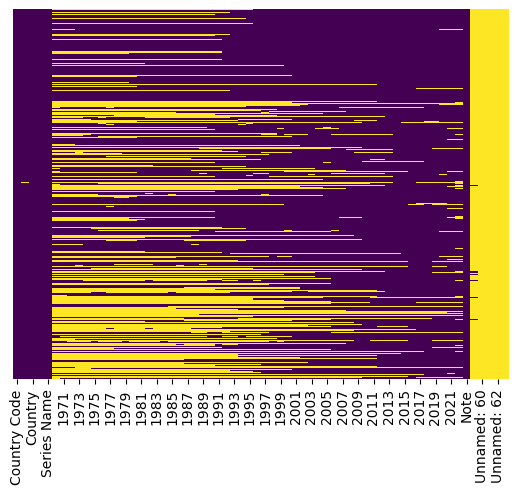

In [18]:
#Vista de valors nulos por columna
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# Eliminaremos los espacios en los titulos de las columnas
df.columns = df.columns.str.replace(' ','_').str.replace(':','_')

In [20]:
col_drop = ['Unnamed__59','Unnamed__60','Unnamed__61','Unnamed__62','Unnamed__63']
df_cpi = df.drop(col_drop, axis=1).copy()


In [21]:
cpi_5 = ['China','Germany','India','Japan','United States']
df_cpi = df_cpi[df_cpi['Country'].isin(cpi_5)]

In [22]:
df_cpi.head(7)

Country_Code  IMF_Country_Code        Country Indicator_Type  \
33           CHN             924.0          China      Inflation   
45           DEU             134.0        Germany      Inflation   
79           IND             534.0          India      Inflation   
88           JPN             158.0          Japan      Inflation   
182          USA             111.0  United States      Inflation   
233          CHN             924.0          China      Inflation   
245          DEU             134.0        Germany      Inflation   

                           Series_Name  1970  1971  1972   1973   1974   1975  \
33   Headline Consumer Price Inflation  1.06  1.05  1.04   1.03   0.92   1.11   
45   Headline Consumer Price Inflation  3.45  5.24  5.48   7.03   6.99   5.91   
79   Headline Consumer Price Inflation  5.10  3.08  6.44  16.94  28.60   5.75   
88   Headline Consumer Price Inflation  7.67  6.40  4.84  11.61  23.22  11.73   
182  Headline Consumer Price Inflation  5.90  4.29  3.27   6.18  11.05   9.14   
233    Energy Consumer Price Inflation   NaN   NaN   NaN    NaN    NaN  -0.10   
245    Energy Consumer Price Inflation  4.30  5.60  4.40  16.40  16.80  10.40   

     1976  1977  1978   1979   1980   1981  1982   1983  1984  1985   1986  \
33   0.34  2.49  0.68   1.93   5.99   2.50  2.00   2.00  2.70  9.50   5.68   
45   4.25  3.73  2.72   4.04   5.44   6.34  5.24   3.29  2.41  2.07  -0.13   
79  -7.63  8.31  2.52   6.28  11.35  13.11  7.89  11.87  8.32  5.56   8.73   
88   9.37  8.16  4.21   3.70   7.78   4.91  2.74   1.90  2.26  2.03   0.60   
182  5.74  6.50  7.63  11.25  13.55  10.33  6.13   3.21  4.30  3.55   1.90   
233 -0.10  0.10  0.10   0.20   0.20   0.60  0.80   1.00  2.20  4.00   3.90   
245  6.90  0.80  2.50  20.90  10.60  16.20  8.00  -0.90  3.40  3.70 -11.50   

     1987   1988   1989  1990   1991   1992   1993   1994   1995  1996  1997  \
33   7.24  18.88  18.19  3.04   3.58   6.37  14.63  24.26  16.79  8.31  2.79   
45   0.25   1.27   2.78  2.70   4.05   5.06   4.47   2.69   1.71  1.45  1.94   
79   8.80   9.38   7.07  8.97  13.87  11.79   6.33  10.25  10.22  8.98  7.16   
88   0.13   0.68   2.27  3.08   3.25   1.76   1.24   0.70  -0.13  0.14  1.75   
182  3.66   4.08   4.83  5.40   4.23   3.03   2.95   2.61   2.81  2.93  2.34   
233  3.60  16.10  27.40  7.10  15.60  21.70  16.90    NaN    NaN   NaN   NaN   
245 -9.30  -2.70   5.00  4.30   4.60   8.76   8.18   4.04   3.02  2.46  2.58   

      1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008   2009  \
33   -0.77 -1.40  0.35  0.72 -0.73  1.13  3.82  1.78  1.65  4.82  5.93  -0.73   
45    0.91  0.59  1.44  1.98  1.42  1.03  1.67  1.55  1.58  2.30  2.63   0.31   
79   13.23  4.67  4.01  3.78  4.30  3.81  3.77  4.25  5.80  6.37  8.35  10.88   
88    0.66 -0.34 -0.68 -0.74 -0.92 -0.26 -0.01 -0.28  0.25  0.06  1.38  -1.35   
182   1.55  2.19  3.38  2.83  1.59  2.27  2.68  3.39  3.23  2.85  3.84  -0.36   
233    NaN   NaN   NaN  2.50 -0.05  2.17  4.98  5.42  4.73  4.38  5.60  -3.50   
245   0.96  1.28  2.79  2.45  0.91  1.51  1.53  2.82  2.94  1.92  3.42   0.42   

      2010  2011  2012   2013  2014  2015  2016  2017  2018  2019  2020  \
33    3.18  5.55  2.62   2.62  1.92  1.44  2.00  1.56  2.07  2.90  2.42   
45    1.10  2.08  2.01   1.50  0.91  0.51  0.49  1.71  1.73  1.35  0.51   
79   11.99  8.86  9.31  10.91  6.35  5.87  4.94  3.60  4.86  4.76  6.62   
88   -0.72 -0.27 -0.05   0.35  2.76  0.79 -0.12  0.47  0.98  0.48 -0.02   
182   1.64  3.16  2.07   1.46  1.62  0.12  1.26  2.14  2.44  1.81  1.23   
233   4.35  5.48  2.10   2.88  2.10  0.65  1.27  2.63  2.26  1.30 -1.57   
245   0.99  3.08  2.23   1.97  0.85 -0.41  0.00  1.24  1.75  1.32  0.70   

      2021   2022                                           Note  
33    0.90   1.97                       Annual average inflation  
45    3.14   7.90                       Annual average inflation  
79    4.89   6.69                       Annual average inflation  
88   -0.23   2.50         

In [23]:
# Establecemos la columna country como índice 
df_cpi = df_cpi.set_index('Country')

In [24]:
# SOlo trabajermos con estos dos tipos de inflación 
df_cpi = df_cpi[df_cpi.Series_Name.isin(['Headline Consumer Price Inflation', 'Producer Price Inflation'])]

In [25]:
df_cpi.head(10)

Country_Code  IMF_Country_Code Indicator_Type  \
Country                                                       
China                  CHN             924.0      Inflation   
Germany                DEU             134.0      Inflation   
India                  IND             534.0      Inflation   
Japan                  JPN             158.0      Inflation   
United States          USA             111.0      Inflation   
China                  CHN             924.0      Inflation   
Germany                DEU             134.0      Inflation   
India                  IND             534.0      Inflation   
Japan                  JPN             158.0      Inflation   
United States          USA             111.0      Inflation   

                                     Series_Name  1970  1971  1972   1973  \
Country                                                                     
China          Headline Consumer Price Inflation  1.06  1.05  1.04   1.03   
Germany        Headline Consumer Price Inflation  3.45  5.24  5.48   7.03   
India          Headline Consumer Price Inflation  5.10  3.08  6.44  16.94   
Japan          Headline Consumer Price Inflation  7.67  6.40  4.84  11.61   
United States  Headline Consumer Price Inflation  5.90  4.29  3.27   6.18   
China                   Producer Price Inflation   NaN   NaN   NaN    NaN   
Germany                 Producer Price Inflation  4.90  4.23  2.65   6.65   
India                   Producer Price Inflation  6.28  5.41  8.49  16.54   
Japan                   Producer Price Inflation  3.39 -0.79  1.61  15.72   
United States           Producer Price Inflation  3.61  3.33  4.41  13.14   

                1974   1975  1976  1977  1978   1979   1980   1981  1982  \
Country                                                                    
China           0.92   1.11  0.34  2.49  0.68   1.93   5.99   2.50  2.00   
Germany         6.99   5.91  4.25  3.73  2.72   4.04   5.44   6.34  5.24   
India          28.60   5.75 -7.63  8.31  2.52   6.28  11.35  13.11  7.89   
Japan          23.22  11.73  9.37  8.16  4.21   3.70   7.78   4.91  2.74   
United States  11.05   9.14  5.74  6.50  7.63  11.25  13.55  10.33  6.13   
China            NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   
Germany        13.39   4.64  3.68  2.77  1.15   4.79   7.56   7.83  5.87   
India          28.39   4.15 -1.99  7.45 -0.27  11.73  20.11  12.31  2.40   
Japan          27.51   2.83  5.46  3.35 -0.49   5.00  14.94   1.37  0.44   
United States  18.81   9.25  4.65  6.13  7.77  12.54  14.13   9.13  2.01   

                1983  1984  1985  1986  1987   1988   1989  1990   1991  \
Country                                                                   
China           2.00  2.70  9.50  5.68  7.24  18.88  18.19  3.04   3.58   
Germany         3.29  2.41  2.07 -0.13  0.25   1.27   2.78  2.70   4.05   
India          11.87  8.32  5.56  8.73  8.80   9.38   7.07  8.97  13.87   
Japan           1.90  2.26  2.03  0.60  0.13   0.68   2.27  3.08   3.25   
United States   3.21  4.30  3.55  1.90  3.66   4.08   4.83  5.40   4.23   
China            NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN    NaN   
Germany         1.46  2.89  2.44 -2.52 -2.49   1.25   3.16  1.72   2.39   
India           7.72  8.47  5.96  5.24  6.42   7.21   6.29  9.10  13.50   
Japan          -0.61  0.09 -0.79 -4.69 -3.12  -0.54   1.88  1.50   1.05   
United States   1.26  2.38 -0.43 -2.89  2.64   4.02   4.96  3.56   0.22   

                1992   1993   1994   1995  1996  1997   1998  1999  2000  \
Country                                                                    
China           6.37  14.63  24.26  16.79  8.31  2.79  -0.77 -1.40  0.35   
Germany         5.06   4.47   2.69   1.71  1.45  1.94   0.91  0.59  1.44   
India          11.79   6.33  10.25  10.22  8.98  7.16  13.23  4.67  4.01   
Japan           1.76   1.24   0.70  -0.13  0.14  1.75   0.66 -0.34 -0.68   
United States   3.03   2.95   2.61   2.81  2.93  2.34   1.55  

### Dataset World population

In [26]:
# Acomodaremos los titulos de las columnas referente a los años
df_pm.columns = df_pm.columns.str.replace('year_','')

In [27]:
# eliminaremos las columnas desde 1960 hasta 1969 para emparejarlas con los mismos años del otro dataset y elimnaos la columna unnamed
col_wp_drop = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','Unnamed: 0']
df_wp_g20 = df_pm.drop(col_wp_drop, axis=1).copy()


In [28]:
# Escogemos los paises correspondientes al G20
g_20 = ['Argentina','Australia','Brazil','Canada','China','France','Germany','India','Indonesia','Italy','Japan','Mexico','Korea, Rep.',
        'Russian Federation','Saudi Arabia','South Africa','Turkey','United Kingdom','United States','Spain']
df_wp_g20 = df_wp_g20[df_wp_g20['country'].isin(g_20)]

In [29]:
# Establecemos la columna country como índice 
df_wp_g20 = df_wp_g20.set_index('country')

### Dataset PIB US$

In [30]:
df_pibt.columns = df_pibt.columns.str.replace(' ','_').str.replace(':','_')

In [31]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']
df_pibt = df_pibt.drop(col_drop, axis=1).copy()

In [32]:
top_5 = ['China','Alemania','India','Japón','Estados Unidos','España']
df_pibt = df_pibt[df_pibt['Country_Name'].isin(top_5)]

In [33]:
df_pibt

Country_Name          1970          1971          1972          1973  \
40            China  9.260264e+10  9.980060e+10  1.136893e+11  1.385432e+11   
55         Alemania  2.158384e+11  2.499851e+11  2.998015e+11  3.983740e+11   
70           España  4.099300e+10  4.661942e+10  5.913242e+10  7.863953e+10   
109           India  6.242248e+10  6.735141e+10  7.146319e+10  8.551527e+10   
119           Japón  2.126092e+11  2.401518e+11  3.180313e+11  4.320827e+11   
251  Estados Unidos  1.073303e+12  1.164850e+12  1.279110e+12  1.425376e+12   

             1974          1975          1976          1977          1978  \
40   1.441890e+11  1.634295e+11  1.539392e+11  1.749359e+11  1.495408e+11   
55   4.453035e+11  4.906365e+11  5.197545e+11  6.004982e+11  7.404700e+11   
70   9.727401e+10  1.147770e+11  1.185072e+11  1.324493e+11  1.605997e+11   
109  9.952590e+10  9.847280e+10  1.027172e+11  1.214866e+11  1.373003e+11   
119  4.796260e+11  5.215419e+11  5.861619e+11  7.214118e+11  1.013612e+12   
251  1.545243e+12  1.684904e+12  1.873412e+12  2.081826e+12  2.351599e+12   

             1979          1980          1981          1982          1983  \
40   1.782806e+11  1.911492e+11  1.958664e+11  2.050897e+11  2.306867e+11   
55   8.813452e+11  9.502909e+11  8.004721e+11  7.765764e+11  7.706843e+11   
70   2.146020e+11  2.327668e+11  2.028079e+11  1.959968e+11  1.709512e+11   
109  1.529917e+11  1.863253e+11  1.934914e+11  2.007156e+11  2.182622e+11   
119  1.055012e+12  1.105386e+12  1.218989e+12  1.134518e+12  1.243324e+12   
251  2.627333e+12  2.857307e+12  3.207041e+12  3.343789e+12  3.634038e+12   

             1984          1985          1986          1987          1988  \
40   2.599465e+11  3.094880e+11  3.007581e+11  2.729730e+11  3.123536e+11   
55   7.251111e+11  7.325349e+11  1.046259e+12  1.298176e+12  1.401233e+12   
70   1.721029e+11  1.807935e+11  2.513211e+11  3.187479e+11  3.761604e+11   
109  2.121576e+11  2.325116e+11  2.489860e+11  2.790336e+11  2.965897e+11   
119  1.318382e+12  1.398893e+12  2.078953e+12  2.532809e+12  3.071684e+12   
251  4.037613e+12  4.338979e+12  4.579631e+12  4.855215e+12  5.236438e+12   

             1989          1990          1991          1992          1993  \
40   3.477681e+11  3.608579e+11  3.833733e+11  4.269157e+11  4.447313e+11   
55   1.398967e+12  1.771671e+12  1.868945e+12  2.131572e+12  2.071324e+12   
70   4.147571e+11  5.365586e+11  5.771662e+11  6.309160e+11  5.250756e+11   
109  2.960421e+11  3.209790e+11  2.701053e+11  2.882081e+11  2.792956e+11   
119  3.054914e+12  3.132818e+12  3.584421e+12  3.908808e+12  4.454144e+12   
251  5.641580e+12  5.963144e+12  6.158129e+12  6.520327e+12  6.858559e+12   

             1994          1995          1996          1997          1998  \
40   5.643219e+11  7.344849e+11  8.637493e+11  9.616020e+11  1.029061e+12   
55   2.205074e+12  2.585792e+12  2.497245e+12  2.211990e+12  2.238991e+12   
70   5.305626e+11  6.146090e+11  6.425890e+11  5.900773e+11  6.192148e+11   
109  3.272756e+11  3.602819e+11  3.928969e+11  4.158676e+11  4.213513e+11   
119  4.998797e+12  5.545565e+12  4.923393e+12  4.492450e+12  4.098363e+12   
251  7.287236e+12  7.639749e+12  8.073122e+12  8.577554e+12  9.062818e+12   

             1999          2000          2001          2002          2003  \
40   1.094010e+12  1.211332e+12  1.339401e+12  1.470558e+12  1.660281e+12   
55   2.194945e+12  1.947982e+12  1.945791e+12  2.078485e+12  2.501640e+12   
70   6.349075e+11  5.983633e+11  6.278300e+11  7.087567e+11  9.074915e+11   
109  4.588204e+11  4.683949e+11  4.854410e+11  5.149379e+11  6.076993e+11   
119  4.635982e+12  4.968359e+12  4.374710e+12  4.182845e+12  4.519563e+12   
251  9.631174e+12  1.025095e+13  1.058193e+13  1.092911e+13  1.145644e+13   

             2004          2005          2006          2007          2008  \
40   1.955347e+12  2.285961e+12  2.752119e+12  3.550328e+12  4.594337e+12   
55   2.814354e+12  2.846864e+12  2.994704e+12  3.425578e+12

### Dataset PIB 

In [34]:
df_pib

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

In [35]:
df_pib.columns = df_pib.columns.str.replace(' ','_').str.replace(':','_')

In [36]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']
df_pib = df_pib.drop(col_drop, axis=1).copy()

In [37]:
top_5 = ['China','Alemania','India','Japón','Estados Unidos','España']
df_pib = df_pib[df_pib['Country_Name'].isin(top_5)]

### Dataset PIB per capita

In [38]:
df_pibpc

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

In [39]:
# Eliminaremos los espacios en los titulos de las columnas
df_pibpc.columns = df_pibpc.columns.str.replace(' ','_').str.replace(':','_')

In [40]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']
df_pibpc = df_pibpc.drop(col_drop, axis=1).copy()

In [41]:
top_5 = ['China','Alemania','India','Japón','Estados Unidos','España']
df_pibpc = df_pibpc[df_pibpc['Country_Name'].isin(top_5)]

### Dataset Desempleo

In [42]:
df_des

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

In [43]:
df_des.columns = df_des.columns.str.replace(' ','_').str.replace(':','_')

In [44]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67']
df_des = df_des.drop(col_drop, axis=1).copy()

In [45]:
top_5 = ['China','Alemania','India','Japón','Estados Unidos','España']
df_des = df_des[df_des['Country_Name'].isin(top_5)]


### Dataset Balanza Comercial

In [46]:
df_bc

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

In [47]:
df_bc.columns = df_bc.columns.str.replace(' ','_').str.replace(':','_')

In [48]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67']
df_bc = df_bc.drop(col_drop, axis=1).copy()

In [49]:
top_5 = ['China','Alemania','India','Japón','Estados Unidos','España']
df_bc = df_bc[df_bc['Country_Name'].isin(top_5)]

## EDA

### Estudio de la inflación en relación del tiempo por país

In [50]:
#df_arg =  df_g20.loc['Argentina'].drop(['Country_Code','IMF_Country_Code','Indicator_Type','Series_Name'], axis=1) # cambiar el nombre del pais por arg_cpi y asi 
#df_arg.index = ['Arg_CPI','Arg_PPI'] # se Cambia el nombre de las primeras dos filas del índice
#df_arg = df_arg.T #Se hace la trasnpuesta del dataset
#df_arg = df_arg.reset_index() # Reseteamos el indice para que los años se puedan cambiar a datetime
#df_arg.columns = ['Year','Arg_CPI','Arg_PPI'] # se cambia el nombre de la primera columna a Year 
#df_arg.drop(df_arg.tail(1).index,inplace=True) # eliminamos la ultima fila que contenia letras cde una Nota 
#df_arg ['Year'] = pd.to_datetime(df_arg['Year'],format= "%Y") # cambiamos la columna Year a tipo datetime 
#df_arg

In [51]:
#fig = px.line(df_arg, x='Year', y="Arg_CPI", title='CPI añor tras año', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
#fig.show()

### Comparación de paises en relación del tiempo segun su inflación

In [52]:
df_cpi =  df_cpi[df_cpi.Series_Name.isin(['Headline Consumer Price Inflation'])]
df_cpi = df_cpi.drop(['Country_Code','IMF_Country_Code','Indicator_Type','Series_Name'], axis=1)
df_cpi.index.name = ''
df_cpi = df_cpi.T
df_cpi = df_cpi.reset_index()
df_cpi.rename(columns={'index':'Year'}, inplace=True)
df_cpi.drop(df_cpi.tail(1).index,inplace=True)
df_cpi ['Year'] = pd.to_datetime(df_cpi['Year'],format= "%Y")
df_cpi

Year  China Germany  India  Japan United States
0  1970-01-01   1.06    3.45    5.1   7.67           5.9
1  1971-01-01   1.05    5.24   3.08    6.4          4.29
2  1972-01-01   1.04    5.48   6.44   4.84          3.27
3  1973-01-01   1.03    7.03  16.94  11.61          6.18
4  1974-01-01   0.92    6.99   28.6  23.22         11.05
5  1975-01-01   1.11    5.91   5.75  11.73          9.14
6  1976-01-01   0.34    4.25  -7.63   9.37          5.74
7  1977-01-01   2.49    3.73   8.31   8.16           6.5
8  1978-01-01   0.68    2.72   2.52   4.21          7.63
9  1979-01-01   1.93    4.04   6.28    3.7         11.25
10 1980-01-01   5.99    5.44  11.35   7.78         13.55
11 1981-01-01    2.5    6.34  13.11   4.91         10.33
12 1982-01-01    2.0    5.24   7.89   2.74          6.13
13 1983-01-01    2.0    3.29  11.87    1.9          3.21
14 1984-01-01    2.7    2.41   8.32   2.26           4.3
15 1985-01-01    9.5    2.07   5.56   2.03          3.55
16 1986-01-01   5.68   -0.13   8.73    0.6           1.9
17 1987-01-01   7.24    0.25    8.8   0.13          3.66
18 1988-01-01  18.88    1.27   9.38   0.68          4.08
19 1989-01-01  18.19    2.78   7.07   2.27          4.83
20 1990-01-01   3.04     2.7   8.97   3.08           5.4
21 1991-01-01   3.58    4.05  13.87   3.25          4.23
22 1992-01-01   6.37    5.06  11.79   1.76          3.03
23 1993-01-01  14.63    4.47   6.33   1.24          2.95
24 1994-01-01  24.26    2.69  10.25    0.7          2.61
25 1995-01-01  16.79    1.71  10.22  -0.13          2.81
26 1996-01-01   8.31    1.45   8.98   0.14          2.93
27 1997-01-01   2.79    1.94   7.16   1.75          2.34
28 1998-01-01  -0.77    0.91  13.23   0.66          1.55
29 1999-01-01   -1.4    0.59   4.67  -0.34          2.19
30 2000-01-01   0.35    1.44   4.01  -0.68          3.38
31 2001-01-01   0.72    1.98   3.78  -0.74          2.83
32 2002-01-01  -0.73    1.42    4.3  -0.92          1.59
33 2003-01-01   1.13    1.03   3.81  -0.26          2.27
34 2004-01-01   3.82    1.67   3.77  -0.01          2.68
35 2005-01-01   1.78    1.55   4.25  -0.28          3.39
36 2006-01-01   1.65    1.58    5.8   0.25          3.23
37 2007-01-01   4.82     2.3   6.37   0.06          2.85
38 2008-01-01   5.93    2.63   8.35   1.38          3.84
39 2009-01-01  -0.73    0.31  10.88  -1.35         -0.36
40 2010-01-01   3.18     1.1  11.99  -0.72          1.64
41 2011-01-01   5.55    2.08   8.86  -0.27          3.16
42 2012-01-01   2.62    2.01   9.31  -0.05          2.07
43 2013-01-01   2.62     1.5  10.91   0.35          1.46
44 2014-01-01   1.92    0.91   6.35   2.76          1.62
45 2015-01-01   1.44    0.51   5.87   0.79          0.12
46 2016-01-01    2.0    0.49   4.94  -0.12          1.26
47 2017-01-01   1.56    1.71    3.6   0.47          2.14
48 2018-01-01   2.07    1.73   4.86   0.98          2.44
49 2019-01-01    2.9    1.35   4.76   0.48          1.81
50 2020-01-01   2.42    0.51   6.62  -0.02          1.23
51 2021-01-01    0.9    3.14   4.89  -0.23           4.7
52 2022-01-01   1.97     7.9   6.69    2.5           8.0

In [53]:
fig = px.line(df_cpi, x='Year', y=['United States','China','India','Japan','Germany'], title='CPI añor tras año', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Comparación de paises en relación del tiempo segun su PIB US$

In [54]:
df_pibt = df_pibt.set_index('Country_Name') 
df_pibt.index.name = ''
df_pibt = df_pibt.T
df_pibt = df_pibt.reset_index()
df_pibt.rename(columns={'index':'Year'},inplace=True)
df_pibt['Year'] = pd.to_datetime(df_pibt['Year'],format= "%Y")

In [55]:
df_pibt

Year         China      Alemania        España         India  \
0  1970-01-01  9.260264e+10  2.158384e+11  4.099300e+10  6.242248e+10   
1  1971-01-01  9.980060e+10  2.499851e+11  4.661942e+10  6.735141e+10   
2  1972-01-01  1.136893e+11  2.998015e+11  5.913242e+10  7.146319e+10   
3  1973-01-01  1.385432e+11  3.983740e+11  7.863953e+10  8.551527e+10   
4  1974-01-01  1.441890e+11  4.453035e+11  9.727401e+10  9.952590e+10   
5  1975-01-01  1.634295e+11  4.906365e+11  1.147770e+11  9.847280e+10   
6  1976-01-01  1.539392e+11  5.197545e+11  1.185072e+11  1.027172e+11   
7  1977-01-01  1.749359e+11  6.004982e+11  1.324493e+11  1.214866e+11   
8  1978-01-01  1.495408e+11  7.404700e+11  1.605997e+11  1.373003e+11   
9  1979-01-01  1.782806e+11  8.813452e+11  2.146020e+11  1.529917e+11   
10 1980-01-01  1.911492e+11  9.502909e+11  2.327668e+11  1.863253e+11   
11 1981-01-01  1.958664e+11  8.004721e+11  2.028079e+11  1.934914e+11   
12 1982-01-01  2.050897e+11  7.765764e+11  1.959968e+11  2.007156e+11   
13 1983-01-01  2.306867e+11  7.706843e+11  1.709512e+11  2.182622e+11   
14 1984-01-01  2.599465e+11  7.251111e+11  1.721029e+11  2.121576e+11   
15 1985-01-01  3.094880e+11  7.325349e+11  1.807935e+11  2.325116e+11   
16 1986-01-01  3.007581e+11  1.046259e+12  2.513211e+11  2.489860e+11   
17 1987-01-01  2.729730e+11  1.298176e+12  3.187479e+11  2.790336e+11   
18 1988-01-01  3.123536e+11  1.401233e+12  3.761604e+11  2.965897e+11   
19 1989-01-01  3.477681e+11  1.398967e+12  4.147571e+11  2.960421e+11   
20 1990-01-01  3.608579e+11  1.771671e+12  5.365586e+11  3.209790e+11   
21 1991-01-01  3.833733e+11  1.868945e+12  5.771662e+11  2.701053e+11   
22 1992-01-01  4.269157e+11  2.131572e+12  6.309160e+11  2.882081e+11   
23 1993-01-01  4.447313e+11  2.071324e+12  5.250756e+11  2.792956e+11   
24 1994-01-01  5.643219e+11  2.205074e+12  5.305626e+11  3.272756e+11   
25 1995-01-01  7.344849e+11  2.585792e+12  6.146090e+11  3.602819e+11   
26 1996-01-01  8.637493e+11  2.497245e+12  6.425890e+11  3.928969e+11   
27 1997-01-01  9.616020e+11  2.211990e+12  5.900773e+11  4.158676e+11   
28 1998-01-01  1.029061e+12  2.238991e+12  6.192148e+11  4.213513e+11   
29 1999-01-01  1.094010e+12  2.194945e+12  6.349075e+11  4.588204e+11   
30 2000-01-01  1.211332e+12  1.947982e+12  5.983633e+11  4.683949e+11   
31 2001-01-01  1.339401e+12  1.945791e+12  6.278300e+11  4.854410e+11   
32 2002-01-01  1.470558e+12  2.078485e+12  7.087567e+11  5.149379e+11   
33 2003-01-01  1.660281e+12  2.501640e+12  9.074915e+11  6.076993e+11   
34 2004-01-01  1.955347e+12  2.814354e+12  1.069056e+12  7.091485e+11   
35 2005-01-01  2.285961e+12  2.846864e+12  1.153716e+12  8.203816e+11   
36 2006-01-01  2.752119e+12  2.994704e+12  1.260399e+12  9.402599e+11   
37 2007-01-01  3.550328e+12  3.425578e+12  1.474003e+12  1.216736e+12   
38 2008-01-01  4.594337e+12  3.745264e+12  1.631863e+12  1.198895e+12   
39 2009-01-01  5.101691e+12  3.411261e+12  1.491473e+12  1.341888e+12   
40 2010-01-01  6.087192e+12  3.399668e+12  1.422108e+12  1.675616e+12   
41 2011-01-01  7.551545e+12  3.749315e+12  1.480710e+12  1.823052e+12   
42 2012-01-01  8.532186e+12  3.527143e+12  1.324751e+12  1.827638e+12   
43 2013-01-01  9.570471e+12  3.733805e+12  1.355580e+12  1.856721e+12   
44 2014-01-01  1.047562e+13  3.889093e+12  1.371821e+12  2.039126e+12   
45 2015-01-01  1.106157e+13  3.357586e+12  1.196157e+12  2.103588e+12   
46 2016-01-01  1.123331e+13  3.469853e+12  1.233555e+12  2.294797e+12   
47 2017-01-01  1.231049e+13  3.690849e+12  1.313245e+12  2.651474e+12   
48 2018-01-01  1.389491e+13  3.974443e+12  1.421703e+12  2.702930e+12   
49 2019-01-01  1.427997e+13  3.888226e+12  1.394320e+12  2.835606e+12   
50 2020-01-01  1.468774e+13  3.889669e+12  1.276963e+12  2.671595e+12   
51 2021-01-01  1.782046e+13  4.259935e+12  1.427381e+12  3.150307e+12   
52 2022-01-01  1.796317e+13  4.072192e+12  1.397509e+12  3.385090e+12   

           Japón  Estados Unidos  
0   2.126092e+11    1.073303e+1

In [56]:
fig = px.line(df_pibt, x='Year', y=['Estados Unidos','China','Alemania','India','Japón'], title='PIB (US$)', template="plotly_dark") 
fig.show()

In [57]:
# Gráfica del Pie 1970
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [2.158384e+11,1.073303e+12,9.260264e+10,6.242248e+10,2.126092e+11]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 1970',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [58]:
# Gráfica del Pie 1980
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [9.502909e+11,2.857307e+12,1.911492e+11,1.863253e+11,1.105386e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 1980',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [59]:
# Gráfica del Pie 1990
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [1.771671e+12,5.963144e+12,3.608579e+11,3.209790e+11,3.132818e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 1990',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [60]:
# Gráfica del Pie 2000
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [1.947982e+12,1.025095e+13,1.211332e+12,4.683949e+11,4.968359e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 2000',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [61]:
# Gráfica del Pie 2010
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [3.3996e+12,1.504896e+13,6.087192e+12,1.675616e+12,5.759072e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 2010',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [62]:
# Gráfica del Pie 2020
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [3.889669e+12,2.106047e+13,1.468774e+13,2.671595e+12,5.048790e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 2020',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [63]:
# Gráfica del Pie 2022
etiquetas_paises= ['Alemania','Estados Unidos','China','India','Japón']
valores_paises = [4.072192e+12,2.546270e+13,1.796317e+13,3.385090e+12,4.231141e+12]
fig_pibt = go.Figure([go.Pie(labels=etiquetas_paises, values=valores_paises,)])
fig_pibt.update_layout(title='PIB por Países 2022',template="plotly_dark")
colores_pibt = ['teal','navy','darkred','red'] 
fig_pibt.update_traces(marker=dict(colors=colores_pibt))

In [64]:
px.bar(df_pibt, x='Year', y='España', template="plotly_dark",color='España',labels={'España':'PIB US $'},)

In [65]:
px.bar(df_pibt, x='Year', y='Alemania', template="plotly_dark",color='Alemania',labels={'España':'PIB US $'},)

In [66]:
px.bar(df_pibt, x='Year', y='Estados Unidos', template="plotly_dark",color='Estados Unidos',labels={'Estados Unidos':'PIB US $'},title='PIB de Estados Unidos')

In [67]:
px.bar(df_pibt, x='Year', y='China', template="plotly_dark",color='China',labels={'China':'PIB US $'},title='PIB de China')

### Comparación de paises en relación del tiempo segun su PIB %

In [68]:
df_pib = df_pib.set_index('Country_Name') 
df_pib.index.name = ''
df_pib = df_pib.T
df_pib = df_pib.reset_index()
df_pib.rename(columns={'index':'Year'},inplace=True)
df_pib['Year'] = pd.to_datetime(df_pib['Year'],format= "%Y")

In [69]:
df_pib

Year      China  Alemania     España     India     Japón  \
0  1970-01-01  19.300000       NaN   4.289183  5.157230  2.454958   
1  1971-01-01   7.060000  3.132700   4.649474  1.642930  4.698992   
2  1972-01-01   3.810000  4.300341   8.149746 -0.553301  8.413547   
3  1973-01-01   7.760000  4.777487   7.788465  3.295521  8.032600   
4  1974-01-01   2.310000  0.890069   5.618786  1.185336 -1.225240   
5  1975-01-01   8.720000 -0.866739   0.542203  9.149912  3.091576   
6  1976-01-01  -1.570000  4.949258   3.303792  1.663104  3.974984   
7  1977-01-01   7.570000  3.347218   2.838574  7.254765  4.390338   
8  1978-01-01  11.325978  3.008493   1.463003  5.712532  5.271942   
9  1979-01-01   7.591325  4.150363   0.041547 -5.238183  5.484042   
10 1980-01-01   7.834145  1.408829   2.208728  6.735822  2.817591   
11 1981-01-01   5.112761  0.529241  -0.132468  6.006204  4.260624   
12 1982-01-01   9.017114 -0.394841   1.246462  3.475733  3.279743   
13 1983-01-01  10.770203  1.572410   1.770116  7.288893  3.630199   
14 1984-01-01  15.191540  2.822948   1.784688  3.820738  4.410880   
15 1985-01-01  13.430678  2.327935   2.321436  5.254299  5.159808   
16 1986-01-01   8.949962  2.287339   3.253322  4.776564  3.294048   
17 1987-01-01  11.657428  1.402152   5.547123  3.965356  4.648861   
18 1988-01-01  11.222595  3.707236   5.094324  9.627783  6.661637   
19 1989-01-01   4.206334  3.896552   4.827030  5.947343  4.925785   
20 1990-01-01   3.920251  5.255006   3.781394  5.533455  4.840929   
21 1991-01-01   9.262786  5.108262   2.546001  1.056831  3.523357   
22 1992-01-01  14.224530  1.923077   0.929215  5.482396  0.900586   
23 1993-01-01  13.883729 -0.976850  -1.031492  4.750776 -0.459220   
24 1994-01-01  13.036807  2.391892   2.383195  6.658924  1.083383   
25 1995-01-01  10.953954  1.544146   2.757494  7.574492  2.631000   
26 1996-01-01   9.922557  0.805823   2.660562  7.549522  3.133871   
27 1997-01-01   9.236780  1.792161   3.702495  4.049821  0.981229   
28 1998-01-01   7.845952  2.013933   4.393101  6.184416 -1.270330   
29 1999-01-01   7.661652  1.887261   4.490553  8.845756 -0.333930   
30 2000-01-01   8.490093  2.912503   5.245944  3.840991  2.764648   
31 2001-01-01   8.335733  1.681468   3.933003  4.823966  0.386103   
32 2002-01-01   9.133631 -0.197974   2.730948  3.803975  0.041962   
33 2003-01-01  10.038030 -0.700117   2.981936  7.860381  1.535125   
34 2004-01-01  10.113621  1.175088   3.122734  7.922937  2.186116   
35 2005-01-01  11.394592  0.731707   3.652084  7.923431  1.803901   
36 2006-01-01  12.720956  3.816442   4.102686  8.060733  1.372350   
37 2007-01-01  14.230861  2.976455   3.604738  7.660815  1.483969   
38 2008-01-01   9.650679  0.959879   0.887067  3.086698 -1.224289   
39 2009-01-01   9.398726 -5.693836  -3.763107  7.861889 -5.693236   
40 2010-01-01  10.635871  4.179882   0.162920  8.497585  4.097918   
41 2011-01-01   9.550832  3.925193  -0.814385  5.241315  0.023810   
42 2012-01-01   7.863736  0.418498  -2.958922  5.456389  1.374751   
43 2013-01-01   7.766150  0.437591  -1.403342  6.386106  2.005100   
44 2014-01-01   7.425764  2.209543   1.395775  7.410228  0.296206   
45 2015-01-01   7.041329  1.491932   3.838519  7.996254  1.560627   
46 2016-01-01   6.848762  2.230000   3.037774  8.256306  0.753827   
47 2017-01-01   6.947201  2.680231   2.975761  6.795383  1.675332   
48 2018-01-01   6.749774  0.981233   2.284469  6.453851  0.643391   
49 2019-01-01   5.950501  1.056604   1.983966  3.871437 -0.402169   
50 2020-01-01   2.238638 -3.696789 -11.325438 -5.831053 -4.278604   
51 2021-01-01   8.447478  2.626987   5.519595  9.050278  2.142487   
52 2022-01-01   2.990805  1.785208   5.451740  7.002952  1.028625   

    Estados Unidos  
0        -0.283491  
1         3.293352  
2         5.258907  
3         5.645723  
4        -0.540552  
5        -0.205456  
6         5.388139  
7         4.624153  
8         5.535305  
9         3.166145  
10       -0.256750  
11        2.537719  
12       

In [70]:
fig = px.line(df_pib, x='Year', y=['Estados Unidos','China','Alemania','Japón','India'], title='Crecimiento del PIB % por año ', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Comparación de paises en relación del tiempo segun su PIB per capita %

In [71]:
df_pibpc = df_pibpc.set_index('Country_Name') 
df_pibpc.index.name = ''
df_pibpc = df_pibpc.T
df_pibpc = df_pibpc.reset_index()
df_pibpc.rename(columns={'index':'Year'},inplace=True)
df_pibpc['Year'] = pd.to_datetime(df_pibpc['Year'],format= "%Y")

In [72]:
df_pibpc

Year      China  Alemania     España     India     Japón  \
0  1970-01-01  16.050399       NaN   3.137323  2.858558  1.281814   
1  1971-01-01   4.159176  2.943650   3.395927 -0.585706  2.426652   
2  1972-01-01   1.290106  3.802476   6.962193 -2.743920  6.905500   
3  1973-01-01   5.327293  4.448017   6.604026  0.996136  6.523024   
4  1974-01-01   0.218006  0.850760   4.471068 -1.074029 -2.529839   
5  1975-01-01   6.816441 -0.496434  -0.539097  6.733781  1.787836   
6  1976-01-01  -3.081322  5.400212   2.217773 -0.558062  2.866778   
7  1977-01-01   6.114002  3.581437   1.785657  4.912096  3.384681   
8  1978-01-01   9.846157  3.098182   0.490728  3.398877  4.318280   
9  1979-01-01   6.165664  4.104331  -0.836528 -7.321991  4.594768   
10 1980-01-01   6.490113  1.198694   1.391315  4.349374  2.010416   
11 1981-01-01   3.774904  0.376243  -0.839887  3.620863  3.503886   
12 1982-01-01   7.423410 -0.300058   0.640409  1.162592  2.565815   
13 1983-01-01   9.181137  1.839034   1.275515  4.892733  2.911865   
14 1984-01-01  13.690020  3.178987   1.362897  1.497908  3.736156   
15 1985-01-01  11.896562  2.556884   1.951329  2.914207  4.503631   
16 1986-01-01   7.341433  2.240535   2.945279  2.460505  2.745615   
17 1987-01-01   9.881164  1.246500   5.273763  1.691962  4.145631   
18 1988-01-01   9.446171  3.302864   4.871692  7.259166  6.218729   
19 1989-01-01   2.620859  3.096180   4.662815  3.673863  4.507170   
20 1990-01-01   2.406559  4.351639   3.675768  3.297854  4.493661   
21 1991-01-01   7.782092  4.345220   2.285325 -1.045105  3.117495   
22 1992-01-01  12.833210  1.151046   0.436115  3.316866  0.526745   
23 1993-01-01  12.581997 -1.625684  -1.543358  2.627466 -0.781376   
24 1994-01-01  11.766389  2.037354   1.896907  4.525134  0.801560   
25 1995-01-01   9.754955  1.246142   2.304957  5.452946  2.390520   
26 1996-01-01   8.776430  0.514437   2.233853  5.471108  2.900141   
27 1997-01-01   8.124498  1.643334   3.268767  2.071873  0.740906   
28 1998-01-01   6.816065  1.998485   3.961965  4.198921 -1.538244   
29 1999-01-01   6.733486  1.821428   4.067886  6.851333 -0.515741   
30 2000-01-01   7.638598  2.773221   4.776401  1.965952  2.592891   
31 2001-01-01   7.551655  1.510558   3.214135  2.945319  0.144512   
32 2002-01-01   8.404880 -0.365628   1.289977  1.975908 -0.190392   
33 2003-01-01   9.354777 -0.755077   1.136294  6.016521  1.318092   
34 2004-01-01   9.461559  1.197055   1.358649  6.132606  2.151723   
35 2005-01-01  10.741375  0.788917   1.915746  6.206011  1.794340   
36 2006-01-01  12.093305  3.933610   2.357772  6.426045  1.308127   
37 2007-01-01  13.635821  3.114246   1.704572  6.093626  1.367422   
38 2008-01-01   9.090280  1.152030  -0.709645  1.630781 -1.272110   
39 2009-01-01   8.855948 -5.454577  -4.611748  6.371709 -5.681452   
40 2010-01-01  10.102833  4.339607  -0.297179  7.013175  4.079223   
41 2011-01-01   8.953816  5.869636  -1.166204  3.818073  0.209252   
42 2012-01-01   7.134524  0.230161  -3.021907  4.060824  1.536787   
43 2013-01-01   7.050734  0.163871  -1.079741  5.014612  2.152371   
44 2014-01-01   6.750760  1.784342   1.699353  6.086180  0.429381   
45 2015-01-01   6.420736  0.617105   3.919117  6.721068  1.668465   
46 2016-01-01   6.238215  1.408102   2.950816  6.980990  0.805363   
47 2017-01-01   6.301863  2.297206   2.734475  5.568334  1.758612   
48 2018-01-01   6.251701  0.678213   1.837460  5.302409  0.771168   
49 2019-01-01   5.575317  0.828958   1.254632  2.811873 -0.262171   
50 2020-01-01   1.995558 -3.775430 -11.757559 -6.726292 -3.996582   
51 2021-01-01   8.350730  2.583557   5.408113  8.184368  2.613376   
52 2022-01-01   3.004297  0.715380   5.010391  6.277404  1.478039   

    Estados Unidos  
0        -1.438451  
1         1.995600  
2         4.138097  
3         4.642156  
4        -1.445134  
5        -1.184581  
6         4.391463  
7         3.577147  
8         4.422985  
9         2.033887  
10       -1.209298  
11        1.536320  
12       

In [73]:
fig = px.line(df_pibpc, x='Year', y=['Estados Unidos','China','Alemania','Japón','India'], title='Crecimiento del PIB per capita por año', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Comparación de paises en relación del tiempo segun su tasa de desempleo

In [74]:
df_des = df_des.set_index('Country_Name') 
df_des.index.name = ''
df_des = df_des.T
df_des = df_des.reset_index()
df_des.rename(columns={'index':'Year'},inplace=True)
df_des['Year'] = pd.to_datetime(df_des['Year'],format= "%Y")
df_des = df_des.drop(range(31)).copy()

In [75]:
df_des

Year  China  Alemania  España   India  Japón  Estados Unidos
31 1991-01-01  2.370     5.320  15.930   6.737  2.100           6.800
32 1992-01-01  2.370     6.320  17.700   6.815  2.200           7.500
33 1993-01-01  2.690     7.680  22.160   6.798  2.500           6.900
34 1994-01-01  2.900     8.730  24.210   6.830  2.900           6.120
35 1995-01-01  3.000     8.160  22.680   7.014  3.200           5.650
36 1996-01-01  3.120     8.820  22.140   7.181  3.400           5.450
37 1997-01-01  3.230     9.860  20.700   7.279  3.400           5.000
38 1998-01-01  3.240     9.790  18.670   7.487  4.100           4.510
39 1999-01-01  3.250     8.850  15.480   7.709  4.700           4.220
40 2000-01-01  3.260     7.920  13.790   7.770  4.750           3.990
41 2001-01-01  3.800     7.770  10.350   7.957  5.020           4.730
42 2002-01-01  4.240     8.480  11.150   8.102  5.390           5.780
43 2003-01-01  4.580     9.780  11.280   8.360  5.250           5.990
44 2004-01-01  4.490    10.730  11.090   8.531  4.730           5.530
45 2005-01-01  4.520    11.170   9.150   8.700  4.450           5.080
46 2006-01-01  4.430    10.250   8.450   8.625  4.190           4.620
47 2007-01-01  4.350     8.660   8.230   8.536  3.890           4.620
48 2008-01-01  4.590     7.520  11.250   8.354  4.000           5.780
49 2009-01-01  4.720     7.740  17.860   8.384  5.070           9.250
50 2010-01-01  4.530     6.970  19.860   8.319  5.100           9.630
51 2011-01-01  4.550     5.820  21.390   8.168  4.550           8.950
52 2012-01-01  4.580     5.380  24.790   8.095  4.360           8.070
53 2013-01-01  4.600     5.230  26.090   8.037  4.040           7.370
54 2014-01-01  4.630     4.980  24.440   7.981  3.590           6.170
55 2015-01-01  4.650     4.620  22.060   7.915  3.390           5.280
56 2016-01-01  4.560     4.120  19.640   7.842  3.130           4.870
57 2017-01-01  4.470     3.750  17.220   7.733  2.820           4.360
58 2018-01-01  4.310     3.380  15.250   7.650  2.470           3.900
59 2019-01-01  4.560     3.140  14.100   6.510  2.350           3.670
60 2020-01-01  5.000     3.860  15.530  10.195  2.800           8.050
61 2021-01-01  4.550     3.570  14.780   7.713  2.800           5.350
62 2022-01-01  4.886     2.989  13.009   7.330  2.641           3.611

In [76]:
fig = px.line(df_des, x='Year', y=['Estados Unidos','China','Alemania','Japón','India'], title='Tasa de Desempleo año tras año', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Comparación de paises en relación del tiempo segun su Balanza Comercial de Bienes y servicios

In [77]:
df_bc = df_bc.set_index('Country_Name') 
df_bc.index.name = ''
df_bc = df_bc.T
df_bc = df_bc.reset_index()
df_bc.rename(columns={'index':'Year'},inplace=True)
df_bc['Year'] = pd.to_datetime(df_bc['Year'],format= "%Y")

In [78]:
df_bc

Year         China      Alemania        España         India  \
0  1960-01-01 -7.311697e+07           NaN           NaN -8.778009e+08   
1  1961-01-01  1.909165e+08           NaN           NaN -6.489006e+08   
2  1962-01-01  5.402531e+08           NaN           NaN -7.854008e+08   
3  1963-01-01  5.808737e+08           NaN           NaN -7.875008e+08   
4  1964-01-01  5.402531e+08           NaN           NaN -1.106701e+09   
5  1965-01-01  3.168402e+08           NaN           NaN -1.133977e+09   
6  1966-01-01  1.990406e+08           NaN           NaN -1.160000e+09   
7  1967-01-01  2.193509e+08           NaN           NaN -9.586667e+08   
8  1968-01-01  2.721576e+08           NaN           NaN -4.800000e+08   
9  1969-01-01  5.118188e+08           NaN           NaN -1.853333e+08   
10 1970-01-01  2.843438e+07 -3.137629e+09 -6.396244e+08 -6.000000e+07   
11 1971-01-01  6.539906e+08 -4.308221e+09  6.176527e+07 -2.257593e+08   
12 1972-01-01  8.418459e+08 -4.876427e+09 -2.971965e+08  2.276667e+08   
13 1973-01-01  6.685381e+08 -3.954585e+09 -1.151374e+09 -4.400356e+08   
14 1974-01-01 -6.832875e+08 -2.132775e+09 -5.181027e+09 -1.183610e+09   
15 1975-01-01 -2.365816e+08 -8.269988e+09 -4.974835e+09 -9.845841e+08   
16 1976-01-01  2.832985e+08 -1.157349e+10 -5.858712e+09  5.873600e+08   
17 1977-01-01  3.714024e+08 -1.287496e+10 -3.523023e+09  1.436488e+08   
18 1978-01-01 -8.048780e+08 -1.412155e+10  5.438802e+07 -3.753260e+08   
19 1979-01-01 -1.356522e+09 -3.151097e+10 -9.178285e+08 -2.171760e+09   
20 1980-01-01 -1.150000e+09 -4.382383e+10 -6.934168e+09 -5.786286e+09   
21 1981-01-01 -3.968254e+06 -3.132609e+10 -5.705560e+09 -5.098907e+09   
22 1982-01-01  3.475844e+09 -2.056255e+10 -5.045354e+09 -4.334109e+09   
23 1983-01-01  1.946178e+09 -2.306473e+10 -2.765797e+09 -4.398714e+09   
24 1984-01-01  4.474286e+07 -2.024161e+10  1.832361e+09 -3.060529e+09   
25 1985-01-01 -1.248697e+10 -1.492425e+10  1.559987e+09 -5.559180e+09   
26 1986-01-01 -7.395998e+09 -3.874830e+09  2.632108e+09 -4.548547e+09   
27 1987-01-01  2.428545e+08 -4.198360e+09 -2.773982e+09 -3.838532e+09   
28 1988-01-01 -3.110175e+09 -4.853123e+09 -7.929114e+09 -4.211605e+09   
29 1989-01-01 -3.755954e+09 -8.627128e+09 -1.733448e+10 -3.362657e+09   
30 1990-01-01  9.756631e+09 -3.400093e+09 -2.232694e+10 -4.492297e+09   
31 1991-01-01  1.075902e+10 -9.112552e+09 -2.283905e+10  2.039268e+06   
32 1992-01-01  4.326840e+09 -1.068879e+10 -2.273029e+10 -2.153621e+09   
33 1993-01-01 -8.470635e+09  1.038684e+09 -8.044782e+09  4.718734e+07   
34 1994-01-01  7.356964e+09  3.606123e+09 -5.423453e+09 -9.882890e+08   
35 1995-01-01  1.195798e+10  1.051999e+10 -6.890846e+09 -4.249571e+09   
36 1996-01-01  1.755005e+10  1.784117e+10 -1.159858e+09 -4.554261e+09   
37 1997-01-01  4.282313e+10  2.384277e+10  1.022727e+09 -5.148242e+09   
38 1998-01-01  4.383691e+10  2.751362e+10 -2.833278e+09 -7.005099e+09   
39 1999-01-01  3.064096e+10  1.212960e+10 -1.227561e+10 -8.770209e+09   
40 2000-01-01  2.878584e+10  3.299144e+09 -1.768533e+10 -4.245767e+09   
41 2001-01-01  2.808633e+10  3.164976e+10 -1.427633e+10 -4.254869e+09   
42 2002-01-01  3.738286e+10  8.834117e+10 -1.411269e+10 -5.045852e+09   
43 2003-01-01  3.582097e+10  9.441456e+10 -2.001815e+10 -4.233284e+09   
44 2004-01-01  5.117438e+10  1.463613e+11 -3.955734e+10 -1.266230e+10   
45 2005-01-01  1.246265e+11  1.480492e+11 -5.542173e+10 -2.289830e+10   
46 2006-01-01  2.089179e+11  1.621957e+11 -7.177380e+10 -2.998110e+10   
47 2007-01-01  3.080347e+11  2.319493e+11 -8.516973e+10 -4.972643e+10   
48 2008-01-01  3.488348e+11  2.274715e+11 -7.727643e+10 -6.202491e+10   
49 2009-01-01  2.201299e+11  1.709417e+11 -1.299798e+10 -7.342584e+10   
50 2010-01-01  2.224009e+11  1.789015e+11 -1.457493e+10 -7.462086e+10   
51 2011-01-01  1.808953e+11  1.840221e+11  4.097916e+09 -1.192833e+11   
52 2012-01-01  2.318640e+11  2.151623e+11  2.735829e+10 -1.229061e+11   
53 2013-01-01  2.348721e+11  2.150104e+11  5.324160e+10 -5.537504e+

In [79]:
fig = px.line(df_bc, x='Year', y=['Estados Unidos','China','Alemania','Japón','India'], title='Balanza Comercial de Bienes y Servicios', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Media PIB mundial (para gráfica)

#### Preprocesamiento 

In [80]:
df_pib_mundial = pd.read_csv(r'C:\Users\nico_\Data\Proyecto_Final_nico\PIB\cvs_pib_banco_mundial.csv',skiprows=4)
df_pib_mundial

Country Name Country Code  \
0                                                Aruba          ABW   
1                                                  NaN          AFE   
2                                           Afganistán          AFG   
3                                                  NaN          AFW   
4                                               Angola          AGO   
5                                              Albania          ALB   
6                                              Andorra          AND   
7                                       El mundo árabe          ARB   
8                               Emiratos Árabes Unidos          ARE   
9                                            Argentina          ARG   
10                                             Armenia          ARM   
11                                     Samoa Americana          ASM   
12                                   Antigua y Barbuda          ATG   
13                                           Australia          AUS   
14                                             Austria          AUT   
15                                          Azerbaiyán          AZE   
16                                             Burundi          BDI   
17                                             Bélgica          BEL   
18                                               Benin          BEN   
19                                        Burkina Faso          BFA   
20                                          Bangladesh          BGD   
21                                            Bulgaria          BGR   
22                                             Bahrein          BHR   
23                                             Bahamas          BHS   
24                                Bosnia y Herzegovina          BIH   
25                                             Belarús          BLR   
26                                              Belice          BLZ   
27                                            Bermudas          BMU   
28                                             Bolivia          BOL   
29                                              Brasil          BRA   
30                                            Barbados          BRB   
31                                   Brunei Darussalam          BRN   
32                                              Bhután          BTN   
33                                            Botswana          BWA   
34                            República Centroafricana          CAF   
35                                              Canadá          CAN   
36                        Europa Central y del Báltico          CEB   
37                                               Suiza          CHE   
38                                     Islas del Canal          CHI   
39                                               Chile          CHL   
40                                               China          CHN   
41                                       Côte d'Ivoire          CIV   
42                                             Camerún          CMR   
43                    Congo, República Democrática del          COD   
44                                Congo, República del          COG   
45                                            Colombia          COL   
46                                             Comoras          COM   
47                                          Cabo Verde          CPV   
48                                          Costa Rica          CRI   
49                          Estados pequeos del Caribe          CSS   
50                                                Cuba          CUB   
51                                             Curacao          CUW   
52                                        Islas Caimán          CYM   
53                                              Chipre          CYP   
54                                     República Checa          CZE   
55                                            Alemania          DE

In [81]:
df_pib_mundial.columns = df_pib_mundial.columns.str.replace(' ','_').str.replace(':','_')

In [82]:
col_drop = ['Country_Code','Indicator_Name','Indicator_Code','Unnamed__67','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969']
df_pib_mundial = df_pib_mundial.drop(col_drop, axis=1).copy()

In [83]:
df_pib_mundial

Country_Name          1970  \
0                                                Aruba           NaN   
1                                                  NaN  4.462989e+10   
2                                           Afganistán  1.748887e+09   
3                                                  NaN  2.359616e+10   
4                                               Angola           NaN   
5                                              Albania           NaN   
6                                              Andorra  7.861762e+07   
7                                       El mundo árabe  4.276854e+10   
8                               Emiratos Árabes Unidos           NaN   
9                                            Argentina  3.158421e+10   
10                                             Armenia           NaN   
11                                     Samoa Americana           NaN   
12                                   Antigua y Barbuda           NaN   
13                                           Australia  4.133361e+10   
14                                             Austria  1.537301e+10   
15                                          Azerbaiyán           NaN   
16                                             Burundi  2.427326e+08   
17                                             Bélgica  2.670620e+10   
18                                               Benin  3.336277e+08   
19                                        Burkina Faso  4.584043e+08   
20                                          Bangladesh  8.992722e+09   
21                                            Bulgaria           NaN   
22                                             Bahrein           NaN   
23                                             Bahamas  5.384232e+08   
24                                Bosnia y Herzegovina           NaN   
25                                             Belarús           NaN   
26                                              Belice  5.333989e+07   
27                                            Bermudas  1.863000e+08   
28                                             Bolivia  1.017003e+09   
29                                              Brasil  4.232766e+10   
30                                            Barbados           NaN   
31                                   Brunei Darussalam  1.790789e+08   
32                                              Bhután           NaN   
33                                            Botswana  9.624330e+07   
34                            República Centroafricana  1.891065e+08   
35                                              Canadá  8.819226e+10   
36                        Europa Central y del Báltico           NaN   
37                                               Suiza           NaN   
38                                     Islas del Canal           NaN   
39                                               Chile  9.144515e+09   
40                                               China  9.260264e+10   
41                                       Côte d'Ivoire  1.455483e+09   
42                                             Camerún  1.151217e+09   
43                    Congo, República Democrática del  4.877685e+09   
44                                Congo, República del  2.749607e+08   
45                                            Colombia  7.198360e+09   
46                                             Comoras           NaN   
47                                          Cabo Verde           NaN   
48                                          Costa Rica  9.848302e+08   
49                          Estados pequeos del Caribe  3.695312e+09   
50                                                Cuba  5.693005e+09   
51                                             Curacao           NaN   
52                                        Islas Caimán           NaN   
53                                              Chipre           NaN   
54                                     República Checa           NaN   
55        

In [84]:
df_pib_mundial = df_pib_mundial.set_index('Country_Name') 
df_pib_mundial.index.name = ''
df_pib_mundial = df_pib_mundial.T
df_pib_mundial = df_pib_mundial.reset_index()
df_pib_mundial.rename(columns={'index':'Year'},inplace=True)
df_pib_mundial['Year'] = pd.to_datetime(df_pib_mundial['Year'],format= "%Y")

In [85]:
df_pib_mundial = df_pib_mundial.set_index('Year')


In [86]:
df_pib_mundial['media_pib_mundial'] = df_pib_mundial.mean(axis=1)

In [87]:
df_pib_mundial['media_pib_mundial']

Year
1970-01-01    1.329856e+11
1971-01-01    1.440012e+11
1972-01-01    1.658798e+11
1973-01-01    2.047564e+11
1974-01-01    2.380640e+11
1975-01-01    2.626554e+11
1976-01-01    2.826706e+11
1977-01-01    3.139502e+11
1978-01-01    3.704557e+11
1979-01-01    4.284012e+11
1980-01-01    4.533290e+11
1981-01-01    4.635072e+11
1982-01-01    4.545655e+11
1983-01-01    4.543515e+11
1984-01-01    4.664392e+11
1985-01-01    4.821387e+11
1986-01-01    5.585651e+11
1987-01-01    6.198577e+11
1988-01-01    6.814720e+11
1989-01-01    7.105461e+11
1990-01-01    7.559333e+11
1991-01-01    7.787802e+11
1992-01-01    8.265186e+11
1993-01-01    8.313524e+11
1994-01-01    8.857459e+11
1995-01-01    9.530886e+11
1996-01-01    9.821352e+11
1997-01-01    9.810602e+11
1998-01-01    9.703863e+11
1999-01-01    9.931767e+11
2000-01-01    1.009807e+12
2001-01-01    9.989322e+11
2002-01-01    1.018484e+12
2003-01-01    1.149289e+12
2004-01-01    1.306611e+12
2005-01-01    1.431441e+12
2006-01-01    1.565918e

In [88]:
df_pibt

Year         China      Alemania        España         India  \
0  1970-01-01  9.260264e+10  2.158384e+11  4.099300e+10  6.242248e+10   
1  1971-01-01  9.980060e+10  2.499851e+11  4.661942e+10  6.735141e+10   
2  1972-01-01  1.136893e+11  2.998015e+11  5.913242e+10  7.146319e+10   
3  1973-01-01  1.385432e+11  3.983740e+11  7.863953e+10  8.551527e+10   
4  1974-01-01  1.441890e+11  4.453035e+11  9.727401e+10  9.952590e+10   
5  1975-01-01  1.634295e+11  4.906365e+11  1.147770e+11  9.847280e+10   
6  1976-01-01  1.539392e+11  5.197545e+11  1.185072e+11  1.027172e+11   
7  1977-01-01  1.749359e+11  6.004982e+11  1.324493e+11  1.214866e+11   
8  1978-01-01  1.495408e+11  7.404700e+11  1.605997e+11  1.373003e+11   
9  1979-01-01  1.782806e+11  8.813452e+11  2.146020e+11  1.529917e+11   
10 1980-01-01  1.911492e+11  9.502909e+11  2.327668e+11  1.863253e+11   
11 1981-01-01  1.958664e+11  8.004721e+11  2.028079e+11  1.934914e+11   
12 1982-01-01  2.050897e+11  7.765764e+11  1.959968e+11  2.007156e+11   
13 1983-01-01  2.306867e+11  7.706843e+11  1.709512e+11  2.182622e+11   
14 1984-01-01  2.599465e+11  7.251111e+11  1.721029e+11  2.121576e+11   
15 1985-01-01  3.094880e+11  7.325349e+11  1.807935e+11  2.325116e+11   
16 1986-01-01  3.007581e+11  1.046259e+12  2.513211e+11  2.489860e+11   
17 1987-01-01  2.729730e+11  1.298176e+12  3.187479e+11  2.790336e+11   
18 1988-01-01  3.123536e+11  1.401233e+12  3.761604e+11  2.965897e+11   
19 1989-01-01  3.477681e+11  1.398967e+12  4.147571e+11  2.960421e+11   
20 1990-01-01  3.608579e+11  1.771671e+12  5.365586e+11  3.209790e+11   
21 1991-01-01  3.833733e+11  1.868945e+12  5.771662e+11  2.701053e+11   
22 1992-01-01  4.269157e+11  2.131572e+12  6.309160e+11  2.882081e+11   
23 1993-01-01  4.447313e+11  2.071324e+12  5.250756e+11  2.792956e+11   
24 1994-01-01  5.643219e+11  2.205074e+12  5.305626e+11  3.272756e+11   
25 1995-01-01  7.344849e+11  2.585792e+12  6.146090e+11  3.602819e+11   
26 1996-01-01  8.637493e+11  2.497245e+12  6.425890e+11  3.928969e+11   
27 1997-01-01  9.616020e+11  2.211990e+12  5.900773e+11  4.158676e+11   
28 1998-01-01  1.029061e+12  2.238991e+12  6.192148e+11  4.213513e+11   
29 1999-01-01  1.094010e+12  2.194945e+12  6.349075e+11  4.588204e+11   
30 2000-01-01  1.211332e+12  1.947982e+12  5.983633e+11  4.683949e+11   
31 2001-01-01  1.339401e+12  1.945791e+12  6.278300e+11  4.854410e+11   
32 2002-01-01  1.470558e+12  2.078485e+12  7.087567e+11  5.149379e+11   
33 2003-01-01  1.660281e+12  2.501640e+12  9.074915e+11  6.076993e+11   
34 2004-01-01  1.955347e+12  2.814354e+12  1.069056e+12  7.091485e+11   
35 2005-01-01  2.285961e+12  2.846864e+12  1.153716e+12  8.203816e+11   
36 2006-01-01  2.752119e+12  2.994704e+12  1.260399e+12  9.402599e+11   
37 2007-01-01  3.550328e+12  3.425578e+12  1.474003e+12  1.216736e+12   
38 2008-01-01  4.594337e+12  3.745264e+12  1.631863e+12  1.198895e+12   
39 2009-01-01  5.101691e+12  3.411261e+12  1.491473e+12  1.341888e+12   
40 2010-01-01  6.087192e+12  3.399668e+12  1.422108e+12  1.675616e+12   
41 2011-01-01  7.551545e+12  3.749315e+12  1.480710e+12  1.823052e+12   
42 2012-01-01  8.532186e+12  3.527143e+12  1.324751e+12  1.827638e+12   
43 2013-01-01  9.570471e+12  3.733805e+12  1.355580e+12  1.856721e+12   
44 2014-01-01  1.047562e+13  3.889093e+12  1.371821e+12  2.039126e+12   
45 2015-01-01  1.106157e+13  3.357586e+12  1.196157e+12  2.103588e+12   
46 2016-01-01  1.123331e+13  3.469853e+12  1.233555e+12  2.294797e+12   
47 2017-01-01  1.231049e+13  3.690849e+12  1.313245e+12  2.651474e+12   
48 2018-01-01  1.389491e+13  3.974443e+12  1.421703e+12  2.702930e+12   
49 2019-01-01  1.427997e+13  3.888226e+12  1.394320e+12  2.835606e+12   
50 2020-01-01  1.468774e+13  3.889669e+12  1.276963e+12  2.671595e+12   
51 2021-01-01  1.782046e+13  4.259935e+12  1.427381e+12  3.150307e+12   
52 2022-01-01  1.796317e+13  4.072192e+12  1.397509e+12  3.385090e+12   

           Japón  Estados Unidos  
0   2.126092e+11    1.073303e+1

In [89]:
df_pibtn = df_pibt.copy()

In [90]:
df_pibtn = pd.merge(df_pibtn, df_pib_mundial['media_pib_mundial'],on='Year',how='left')

#### Grafica 

In [91]:
fig = px.line(df_pibtn, x='Year', y=['Estados Unidos','China','Alemania','Japón','India','media_pib_mundial'], title='Crecimiento del PIB % por año ', template="plotly_dark") #Podemos adatpar el fondo del gráfico mediante el uso de templates.
fig.show()

### Otras Gráficas

In [92]:
fig = px.histogram(df_bc, x="Year", y='China' ,template="plotly_dark", marginal="box", hover_data=df_bc.columns)
fig.show()

In [93]:
fig = px.box(df_cpi, y="China", template="plotly_dark",color_discrete_sequence=['darkred'])
fig.show()

In [94]:
fig = px.box(df_cpi, y="United States", template="plotly_dark",color_discrete_sequence=['blue'])
fig.show()

In [95]:
fig = px.violin(df_cpi, y="China", template="plotly_dark", points="all")
fig.show()

In [96]:
fig = px.violin(df_cpi, y="United States", template="plotly_dark", points="all")
fig.show()

## CDA

### China

#### Test de Normalidad 

In [97]:
data_pib_china = [9.570471e+12,1.047562e+13, 1.106157e+13, 1.123331e+13, 1.231049e+13, 1.389491e+13, 1.427997e+13, 1.468774e+13, 1.782046e+13, 1.796317e+13 ]
stat, p = normaltest(data_pib_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.965, p=0.617
No podemos rechazar que siga una distribución Gaussiana


c:\Users\nico_\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



In [98]:
data_cpi_china = [2.62, 1.92, 1.44, 2.0, 1.56, 2.07, 2.9, 2.42,  0.9, 1.97]
stat, p = normaltest(data_cpi_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.214, p=0.899
No podemos rechazar que siga una distribución Gaussiana


In [99]:
data_des_china = [4.600, 4.630, 4.650, 4.560, 4.470, 4.310, 4.560, 5.000,  4.550, 4.886]
stat, p = normaltest(data_des_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=1.723, p=0.423
No podemos rechazar que siga una distribución Gaussiana


#### Correlaciones

Test Pearson

In [100]:
data_pib_china = [9.570471e+12,1.047562e+13, 1.106157e+13, 1.123331e+13, 1.231049e+13, 1.389491e+13, 1.427997e+13, 1.468774e+13, 1.782046e+13, 1.796317e+13 ]
data_cpi_china = [2.62, 1.92, 1.44, 2.0, 1.56, 2.07, 2.9, 2.42,  0.9, 1.97]
stat, p = pearsonr(data_pib_china, data_cpi_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=-0.258, p=0.472
Probablemente independientes


In [101]:
data_pib_china = [9.570471e+12,1.047562e+13, 1.106157e+13, 1.123331e+13, 1.231049e+13, 1.389491e+13, 1.427997e+13, 1.468774e+13, 1.782046e+13, 1.796317e+13 ]
data_des_china = [4.600, 4.630, 4.650, 4.560, 4.470, 4.310, 4.560, 5.000,  4.550, 4.886]
stat, p = pearsonr(data_pib_china, data_des_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.281, p=0.431
Probablemente independientes


Test Spearman 

In [102]:
# Correlación entre el PIB y el CPI de china en los ultimos 10 años 
data_pib_china = [9.570471e+12,1.047562e+13, 1.106157e+13, 1.123331e+13, 1.231049e+13, 1.389491e+13, 1.427997e+13, 1.468774e+13, 1.782046e+13, 1.796317e+13 ]
data_cpi_china = [2.62, 1.92, 1.44, 2.0, 1.56, 2.07, 2.9, 2.42,  0.9, 1.97]
stat, p = spearmanr(data_pib_china, data_cpi_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=-0.067, p=0.855
Probablemente independientes


In [103]:
# Correlación entre el PIB y la tasa de desempleo en china de los ultimos 10 años 

data_pib_china = [9.570471e+12,1.047562e+13, 1.106157e+13, 1.123331e+13, 1.231049e+13, 1.389491e+13, 1.427997e+13, 1.468774e+13, 1.782046e+13, 1.796317e+13 ]
data_des_china = [4.600, 4.630, 4.650, 4.560, 4.470, 4.310, 4.560, 5.000,  4.550, 4.886]
stat, p = spearmanr(data_pib_china, data_des_china)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.049, p=0.894
Probablemente independientes


### USA

#### Test de Normalidad 

In [104]:
data_pib_usa = [1.684319e+13, 1.755068e+13, 1.820602e+13, 1.869511e+13, 1.947734e+13, 2.053306e+13, 2.138098e+13, 2.106047e+13, 2.331508e+13, 2.546270e+13]
stat, p = normaltest(data_pib_usa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=1.211, p=0.546
No podemos rechazar que siga una distribución Gaussiana


In [105]:
data_cpi_usa = [1.46, 1.62, 0.12, 1.26, 2.14, 2.44, 1.81, 1.23, 4.7, 8.0]
stat, p = normaltest(data_cpi_usa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=11.650, p=0.003
No sigue una distribución Gaussiana


In [106]:
data_des_usa = [7.370, 6.170, 5.280, 4.870, 4.360, 3.900, 3.670, 8.050, 5.350, 3.611]
stat, p = normaltest(data_des_usa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=1.327, p=0.515
No podemos rechazar que siga una distribución Gaussiana


#### Test de Correlación

Test de Spearman 

In [107]:
# Correlación entre el PIB y el CPI de USA en los ultimos 10 años 
data_pib_usa = [1.684319e+13, 1.755068e+13, 1.820602e+13, 1.869511e+13, 1.947734e+13, 2.053306e+13, 2.138098e+13, 2.106047e+13, 2.331508e+13, 2.546270e+13]
data_cpi_usa = [1.46, 1.62, 0.12, 1.26, 2.14, 2.44, 1.81, 1.23, 4.7, 8.0]
stat, p = spearmanr(data_pib_usa, data_cpi_usa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.636, p=0.048
Probablemente dependientes


In [108]:
# Correlación entre el PIB y de la tasa de desempleo de USA en los ultimos 10 años 
data_pib_usa = [1.684319e+13, 1.755068e+13, 1.820602e+13, 1.869511e+13, 1.947734e+13, 2.053306e+13, 2.138098e+13, 2.106047e+13, 2.331508e+13, 2.546270e+13]
data_des_usa = [7.370, 6.170, 5.280, 4.870, 4.360, 3.900, 3.670, 8.050, 5.350, 3.611]
stat, p = spearmanr(data_pib_usa, data_des_usa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=-0.515, p=0.128
Probablemente independientes


## Machine Learning  Series Temporales

### Dataframe PIB US$

In [109]:
df_pibt

Year         China      Alemania        España         India  \
0  1970-01-01  9.260264e+10  2.158384e+11  4.099300e+10  6.242248e+10   
1  1971-01-01  9.980060e+10  2.499851e+11  4.661942e+10  6.735141e+10   
2  1972-01-01  1.136893e+11  2.998015e+11  5.913242e+10  7.146319e+10   
3  1973-01-01  1.385432e+11  3.983740e+11  7.863953e+10  8.551527e+10   
4  1974-01-01  1.441890e+11  4.453035e+11  9.727401e+10  9.952590e+10   
5  1975-01-01  1.634295e+11  4.906365e+11  1.147770e+11  9.847280e+10   
6  1976-01-01  1.539392e+11  5.197545e+11  1.185072e+11  1.027172e+11   
7  1977-01-01  1.749359e+11  6.004982e+11  1.324493e+11  1.214866e+11   
8  1978-01-01  1.495408e+11  7.404700e+11  1.605997e+11  1.373003e+11   
9  1979-01-01  1.782806e+11  8.813452e+11  2.146020e+11  1.529917e+11   
10 1980-01-01  1.911492e+11  9.502909e+11  2.327668e+11  1.863253e+11   
11 1981-01-01  1.958664e+11  8.004721e+11  2.028079e+11  1.934914e+11   
12 1982-01-01  2.050897e+11  7.765764e+11  1.959968e+11  2.007156e+11   
13 1983-01-01  2.306867e+11  7.706843e+11  1.709512e+11  2.182622e+11   
14 1984-01-01  2.599465e+11  7.251111e+11  1.721029e+11  2.121576e+11   
15 1985-01-01  3.094880e+11  7.325349e+11  1.807935e+11  2.325116e+11   
16 1986-01-01  3.007581e+11  1.046259e+12  2.513211e+11  2.489860e+11   
17 1987-01-01  2.729730e+11  1.298176e+12  3.187479e+11  2.790336e+11   
18 1988-01-01  3.123536e+11  1.401233e+12  3.761604e+11  2.965897e+11   
19 1989-01-01  3.477681e+11  1.398967e+12  4.147571e+11  2.960421e+11   
20 1990-01-01  3.608579e+11  1.771671e+12  5.365586e+11  3.209790e+11   
21 1991-01-01  3.833733e+11  1.868945e+12  5.771662e+11  2.701053e+11   
22 1992-01-01  4.269157e+11  2.131572e+12  6.309160e+11  2.882081e+11   
23 1993-01-01  4.447313e+11  2.071324e+12  5.250756e+11  2.792956e+11   
24 1994-01-01  5.643219e+11  2.205074e+12  5.305626e+11  3.272756e+11   
25 1995-01-01  7.344849e+11  2.585792e+12  6.146090e+11  3.602819e+11   
26 1996-01-01  8.637493e+11  2.497245e+12  6.425890e+11  3.928969e+11   
27 1997-01-01  9.616020e+11  2.211990e+12  5.900773e+11  4.158676e+11   
28 1998-01-01  1.029061e+12  2.238991e+12  6.192148e+11  4.213513e+11   
29 1999-01-01  1.094010e+12  2.194945e+12  6.349075e+11  4.588204e+11   
30 2000-01-01  1.211332e+12  1.947982e+12  5.983633e+11  4.683949e+11   
31 2001-01-01  1.339401e+12  1.945791e+12  6.278300e+11  4.854410e+11   
32 2002-01-01  1.470558e+12  2.078485e+12  7.087567e+11  5.149379e+11   
33 2003-01-01  1.660281e+12  2.501640e+12  9.074915e+11  6.076993e+11   
34 2004-01-01  1.955347e+12  2.814354e+12  1.069056e+12  7.091485e+11   
35 2005-01-01  2.285961e+12  2.846864e+12  1.153716e+12  8.203816e+11   
36 2006-01-01  2.752119e+12  2.994704e+12  1.260399e+12  9.402599e+11   
37 2007-01-01  3.550328e+12  3.425578e+12  1.474003e+12  1.216736e+12   
38 2008-01-01  4.594337e+12  3.745264e+12  1.631863e+12  1.198895e+12   
39 2009-01-01  5.101691e+12  3.411261e+12  1.491473e+12  1.341888e+12   
40 2010-01-01  6.087192e+12  3.399668e+12  1.422108e+12  1.675616e+12   
41 2011-01-01  7.551545e+12  3.749315e+12  1.480710e+12  1.823052e+12   
42 2012-01-01  8.532186e+12  3.527143e+12  1.324751e+12  1.827638e+12   
43 2013-01-01  9.570471e+12  3.733805e+12  1.355580e+12  1.856721e+12   
44 2014-01-01  1.047562e+13  3.889093e+12  1.371821e+12  2.039126e+12   
45 2015-01-01  1.106157e+13  3.357586e+12  1.196157e+12  2.103588e+12   
46 2016-01-01  1.123331e+13  3.469853e+12  1.233555e+12  2.294797e+12   
47 2017-01-01  1.231049e+13  3.690849e+12  1.313245e+12  2.651474e+12   
48 2018-01-01  1.389491e+13  3.974443e+12  1.421703e+12  2.702930e+12   
49 2019-01-01  1.427997e+13  3.888226e+12  1.394320e+12  2.835606e+12   
50 2020-01-01  1.468774e+13  3.889669e+12  1.276963e+12  2.671595e+12   
51 2021-01-01  1.782046e+13  4.259935e+12  1.427381e+12  3.150307e+12   
52 2022-01-01  1.796317e+13  4.072192e+12  1.397509e+12  3.385090e+12   

           Japón  Estados Unidos  
0   2.126092e+11    1.073303e+1

In [110]:
# PIB USA
col_drop = ['Alemania','China','España','Japón','India']
df_pibt_usa = df_pibt.drop(col_drop,axis=1)
df_pibt_usa

Year  Estados Unidos
0  1970-01-01    1.073303e+12
1  1971-01-01    1.164850e+12
2  1972-01-01    1.279110e+12
3  1973-01-01    1.425376e+12
4  1974-01-01    1.545243e+12
5  1975-01-01    1.684904e+12
6  1976-01-01    1.873412e+12
7  1977-01-01    2.081826e+12
8  1978-01-01    2.351599e+12
9  1979-01-01    2.627333e+12
10 1980-01-01    2.857307e+12
11 1981-01-01    3.207041e+12
12 1982-01-01    3.343789e+12
13 1983-01-01    3.634038e+12
14 1984-01-01    4.037613e+12
15 1985-01-01    4.338979e+12
16 1986-01-01    4.579631e+12
17 1987-01-01    4.855215e+12
18 1988-01-01    5.236438e+12
19 1989-01-01    5.641580e+12
20 1990-01-01    5.963144e+12
21 1991-01-01    6.158129e+12
22 1992-01-01    6.520327e+12
23 1993-01-01    6.858559e+12
24 1994-01-01    7.287236e+12
25 1995-01-01    7.639749e+12
26 1996-01-01    8.073122e+12
27 1997-01-01    8.577554e+12
28 1998-01-01    9.062818e+12
29 1999-01-01    9.631174e+12
30 2000-01-01    1.025095e+13
31 2001-01-01    1.058193e+13
32 2002-01-01    1.092911e+13
33 2003-01-01    1.145644e+13
34 2004-01-01    1.221719e+13
35 2005-01-01    1.303920e+13
36 2006-01-01    1.381559e+13
37 2007-01-01    1.447423e+13
38 2008-01-01    1.476986e+13
39 2009-01-01    1.447806e+13
40 2010-01-01    1.504896e+13
41 2011-01-01    1.559973e+13
42 2012-01-01    1.625397e+13
43 2013-01-01    1.684319e+13
44 2014-01-01    1.755068e+13
45 2015-01-01    1.820602e+13
46 2016-01-01    1.869511e+13
47 2017-01-01    1.947734e+13
48 2018-01-01    2.053306e+13
49 2019-01-01    2.138098e+13
50 2020-01-01    2.106047e+13
51 2021-01-01    2.331508e+13
52 2022-01-01    2.546270e+13

In [111]:
# PIB China
col_drop = ['Alemania','Estados Unidos','España','Japón','India']
df_pibt_china = df_pibt.drop(col_drop,axis=1)
df_pibt_china

Year         China
0  1970-01-01  9.260264e+10
1  1971-01-01  9.980060e+10
2  1972-01-01  1.136893e+11
3  1973-01-01  1.385432e+11
4  1974-01-01  1.441890e+11
5  1975-01-01  1.634295e+11
6  1976-01-01  1.539392e+11
7  1977-01-01  1.749359e+11
8  1978-01-01  1.495408e+11
9  1979-01-01  1.782806e+11
10 1980-01-01  1.911492e+11
11 1981-01-01  1.958664e+11
12 1982-01-01  2.050897e+11
13 1983-01-01  2.306867e+11
14 1984-01-01  2.599465e+11
15 1985-01-01  3.094880e+11
16 1986-01-01  3.007581e+11
17 1987-01-01  2.729730e+11
18 1988-01-01  3.123536e+11
19 1989-01-01  3.477681e+11
20 1990-01-01  3.608579e+11
21 1991-01-01  3.833733e+11
22 1992-01-01  4.269157e+11
23 1993-01-01  4.447313e+11
24 1994-01-01  5.643219e+11
25 1995-01-01  7.344849e+11
26 1996-01-01  8.637493e+11
27 1997-01-01  9.616020e+11
28 1998-01-01  1.029061e+12
29 1999-01-01  1.094010e+12
30 2000-01-01  1.211332e+12
31 2001-01-01  1.339401e+12
32 2002-01-01  1.470558e+12
33 2003-01-01  1.660281e+12
34 2004-01-01  1.955347e+12
35 2005-01-01  2.285961e+12
36 2006-01-01  2.752119e+12
37 2007-01-01  3.550328e+12
38 2008-01-01  4.594337e+12
39 2009-01-01  5.101691e+12
40 2010-01-01  6.087192e+12
41 2011-01-01  7.551545e+12
42 2012-01-01  8.532186e+12
43 2013-01-01  9.570471e+12
44 2014-01-01  1.047562e+13
45 2015-01-01  1.106157e+13
46 2016-01-01  1.123331e+13
47 2017-01-01  1.231049e+13
48 2018-01-01  1.389491e+13
49 2019-01-01  1.427997e+13
50 2020-01-01  1.468774e+13
51 2021-01-01  1.782046e+13
52 2022-01-01  1.796317e+13

<!-- ### Dataframe PIB monto US $ -->

### PIB US$ (Aplicación del modelo ARIMA )

#### USA

In [115]:
df_pibt_usa

Year  Estados Unidos
0  1970-01-01    1.073303e+12
1  1971-01-01    1.164850e+12
2  1972-01-01    1.279110e+12
3  1973-01-01    1.425376e+12
4  1974-01-01    1.545243e+12
5  1975-01-01    1.684904e+12
6  1976-01-01    1.873412e+12
7  1977-01-01    2.081826e+12
8  1978-01-01    2.351599e+12
9  1979-01-01    2.627333e+12
10 1980-01-01    2.857307e+12
11 1981-01-01    3.207041e+12
12 1982-01-01    3.343789e+12
13 1983-01-01    3.634038e+12
14 1984-01-01    4.037613e+12
15 1985-01-01    4.338979e+12
16 1986-01-01    4.579631e+12
17 1987-01-01    4.855215e+12
18 1988-01-01    5.236438e+12
19 1989-01-01    5.641580e+12
20 1990-01-01    5.963144e+12
21 1991-01-01    6.158129e+12
22 1992-01-01    6.520327e+12
23 1993-01-01    6.858559e+12
24 1994-01-01    7.287236e+12
25 1995-01-01    7.639749e+12
26 1996-01-01    8.073122e+12
27 1997-01-01    8.577554e+12
28 1998-01-01    9.062818e+12
29 1999-01-01    9.631174e+12
30 2000-01-01    1.025095e+13
31 2001-01-01    1.058193e+13
32 2002-01-01    1.092911e+13
33 2003-01-01    1.145644e+13
34 2004-01-01    1.221719e+13
35 2005-01-01    1.303920e+13
36 2006-01-01    1.381559e+13
37 2007-01-01    1.447423e+13
38 2008-01-01    1.476986e+13
39 2009-01-01    1.447806e+13
40 2010-01-01    1.504896e+13
41 2011-01-01    1.559973e+13
42 2012-01-01    1.625397e+13
43 2013-01-01    1.684319e+13
44 2014-01-01    1.755068e+13
45 2015-01-01    1.820602e+13
46 2016-01-01    1.869511e+13
47 2017-01-01    1.947734e+13
48 2018-01-01    2.053306e+13
49 2019-01-01    2.138098e+13
50 2020-01-01    2.106047e+13
51 2021-01-01    2.331508e+13
52 2022-01-01    2.546270e+13

In [116]:
df_pibt_usa = df_pibt_usa.set_index('Year')

Estacionariedad

In [117]:
adft = adfuller(df_pibt_usa, autolag="AIC")
output_adf = pd.DataFrame({"Metric": ["p_value", "number of lags"], "Value": [adft[1], adft[2]]})
output_adf

Metric  Value
0         p_value    1.0
1  number of lags    2.0

decimos que no es estacionario debido a que el P-valor es mayor a 0.05

Autocorrelación

In [118]:
for i in range(1,52,2):
    autocorrelation = df_pibt_usa["Estados Unidos"].autocorr(lag = i)
    print(f"La autocorrelación para {i} años es {autocorrelation}")

La autocorrelación para 1 años es 0.9986506360551298
La autocorrelación para 3 años es 0.9977859916943687
La autocorrelación para 5 años es 0.996342252244537
La autocorrelación para 7 años es 0.9960050950310595
La autocorrelación para 9 años es 0.9946327226299412
La autocorrelación para 11 años es 0.9939703507372404
La autocorrelación para 13 años es 0.9930459914370261
La autocorrelación para 15 años es 0.9955199499699774
La autocorrelación para 17 años es 0.996269957368045
La autocorrelación para 19 años es 0.9949216200206351
La autocorrelación para 21 años es 0.9944365545517143
La autocorrelación para 23 años es 0.9939721092626098
La autocorrelación para 25 años es 0.9921526272511575
La autocorrelación para 27 años es 0.9903173207640631
La autocorrelación para 29 años es 0.9881676866460606
La autocorrelación para 31 años es 0.9848626674392167
La autocorrelación para 33 años es 0.9885317614112165
La autocorrelación para 35 años es 0.9865019701113956
La autocorrelación para 37 años es 

descomposición

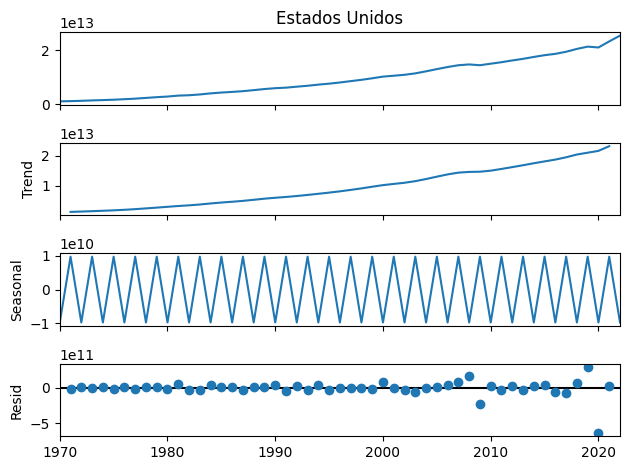

In [119]:
descomp = seasonal_decompose(df_pibt_usa["Estados Unidos"], period = 2)
descomp.plot()
plt.show()

In [120]:
df_pibt_usa

Estados Unidos
Year                      
1970-01-01    1.073303e+12
1971-01-01    1.164850e+12
1972-01-01    1.279110e+12
1973-01-01    1.425376e+12
1974-01-01    1.545243e+12
1975-01-01    1.684904e+12
1976-01-01    1.873412e+12
1977-01-01    2.081826e+12
1978-01-01    2.351599e+12
1979-01-01    2.627333e+12
1980-01-01    2.857307e+12
1981-01-01    3.207041e+12
1982-01-01    3.343789e+12
1983-01-01    3.634038e+12
1984-01-01    4.037613e+12
1985-01-01    4.338979e+12
1986-01-01    4.579631e+12
1987-01-01    4.855215e+12
1988-01-01    5.236438e+12
1989-01-01    5.641580e+12
1990-01-01    5.963144e+12
1991-01-01    6.158129e+12
1992-01-01    6.520327e+12
1993-01-01    6.858559e+12
1994-01-01    7.287236e+12
1995-01-01    7.639749e+12
1996-01-01    8.073122e+12
1997-01-01    8.577554e+12
1998-01-01    9.062818e+12
1999-01-01    9.631174e+12
2000-01-01    1.025095e+13
2001-01-01    1.058193e+13
2002-01-01    1.092911e+13
2003-01-01    1.145644e+13
2004-01-01    1.221719e+13
2005-01-01    1.303920e+13
2006-01-01    1.381559e+13
2007-01-01    1.447423e+13
2008-01-01    1.476986e+13
2009-01-01    1.447806e+13
2010-01-01    1.504896e+13
2011-01-01    1.559973e+13
2012-01-01    1.625397e+13
2013-01-01    1.684319e+13
2014-01-01    1.755068e+13
2015-01-01    1.820602e+13
2016-01-01    1.869511e+13
2017-01-01    1.947734e+13
2018-01-01    2.053306e+13
2019-01-01    2.138098e+13
2020-01-01    2.106047e+13
2021-01-01    2.331508e+13
2022-01-01    2.546270e+13

forecasting

In [121]:
df_pibt_usa['Year'] = df_pibt_usa.index
# Dataframe para entrenamiento (fragmentar esta casilla si se quiere entender el paso a paso del codigo)
train_usa = df_pibt_usa[df_pibt_usa['Year'] < pd.to_datetime("2017-01-01", format='%Y-%m-%d')] # Separamos train hasta el agosto de 1960
train_usa['train'] = train_usa['Estados Unidos']
del train_usa['Year']
del train_usa['Estados Unidos']

C:\Users\nico_\AppData\Local\Temp\ipykernel_43368\773912445.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
train_usa

train
Year                    
1970-01-01  1.073303e+12
1971-01-01  1.164850e+12
1972-01-01  1.279110e+12
1973-01-01  1.425376e+12
1974-01-01  1.545243e+12
1975-01-01  1.684904e+12
1976-01-01  1.873412e+12
1977-01-01  2.081826e+12
1978-01-01  2.351599e+12
1979-01-01  2.627333e+12
1980-01-01  2.857307e+12
1981-01-01  3.207041e+12
1982-01-01  3.343789e+12
1983-01-01  3.634038e+12
1984-01-01  4.037613e+12
1985-01-01  4.338979e+12
1986-01-01  4.579631e+12
1987-01-01  4.855215e+12
1988-01-01  5.236438e+12
1989-01-01  5.641580e+12
1990-01-01  5.963144e+12
1991-01-01  6.158129e+12
1992-01-01  6.520327e+12
1993-01-01  6.858559e+12
1994-01-01  7.287236e+12
1995-01-01  7.639749e+12
1996-01-01  8.073122e+12
1997-01-01  8.577554e+12
1998-01-01  9.062818e+12
1999-01-01  9.631174e+12
2000-01-01  1.025095e+13
2001-01-01  1.058193e+13
2002-01-01  1.092911e+13
2003-01-01  1.145644e+13
2004-01-01  1.221719e+13
2005-01-01  1.303920e+13
2006-01-01  1.381559e+13
2007-01-01  1.447423e+13
2008-01-01  1.476986e+13
2009-01-01  1.447806e+13
2010-01-01  1.504896e+13
2011-01-01  1.559973e+13
2012-01-01  1.625397e+13
2013-01-01  1.684319e+13
2014-01-01  1.755068e+13
2015-01-01  1.820602e+13
2016-01-01  1.869511e+13

In [123]:
# Dataframe de testeo
test_usa = df_pibt_usa[df_pibt_usa['Year'] >= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]
del test_usa['Year']
test_usa['test'] = test_usa['Estados Unidos']
del test_usa['Estados Unidos']

C:\Users\nico_\AppData\Local\Temp\ipykernel_43368\3656167311.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



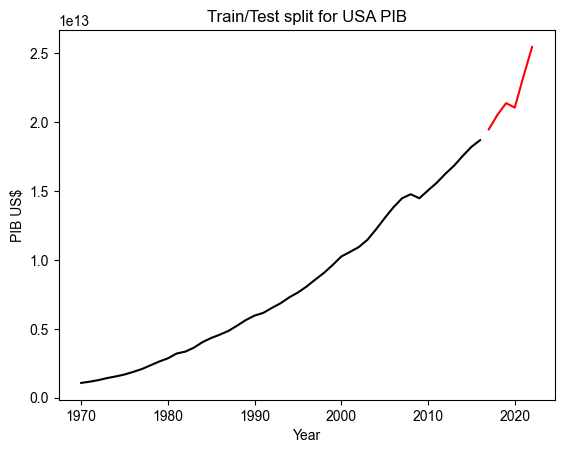

In [124]:
# Visualizar datos de entrenamiento vs datos de testeo
plt.plot(train_usa, color = "black")
plt.plot(test_usa, color = "red")
plt.title("Train/Test split for USA PIB")
plt.ylabel("PIB US$")
plt.xlabel('Year')
sns.set()
plt.show()

In [125]:
from pmdarima.arima import auto_arima
# Buscamos los mejores parámetros para el modelo ARIMA
model = auto_arima(train_usa, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_usa)
# Creamos predicciones sobre el modelo entrenado
forecast_usa = model.predict(n_periods=len(test_usa))
forecast_usa = pd.DataFrame(forecast_usa,index = test_usa.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2461.445, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2468.922, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2469.754, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2468.914, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2464.270, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2464.248, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=2463.221, Time=0.11 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=2463.491, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2463.162, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=2465.580, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2465.203, Time=0.04 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 1.058 seconds


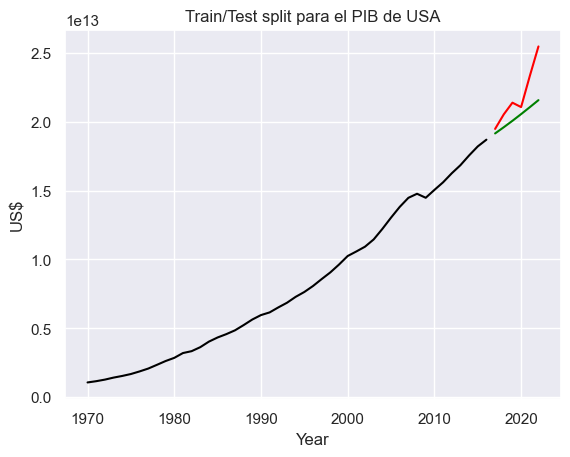

In [126]:
forecast_usa# Visualizar datos de entrenamiento vs datos de testeo vs el forecast
plt.plot(train_usa, color = "black")
plt.plot(test_usa, color = "red")
plt.plot(forecast_usa, color = "green")
plt.title("Train/Test split para el PIB de USA")
plt.ylabel("US$")
plt.xlabel('Year')
sns.set()
plt.show()

In [127]:
rms = sqrt(mean_squared_error(test_usa, forecast_usa))
print("RMSE: ", rms)

RMSE:  1969500890269.1184


#### China

In [128]:
df_pibt_china

Year         China
0  1970-01-01  9.260264e+10
1  1971-01-01  9.980060e+10
2  1972-01-01  1.136893e+11
3  1973-01-01  1.385432e+11
4  1974-01-01  1.441890e+11
5  1975-01-01  1.634295e+11
6  1976-01-01  1.539392e+11
7  1977-01-01  1.749359e+11
8  1978-01-01  1.495408e+11
9  1979-01-01  1.782806e+11
10 1980-01-01  1.911492e+11
11 1981-01-01  1.958664e+11
12 1982-01-01  2.050897e+11
13 1983-01-01  2.306867e+11
14 1984-01-01  2.599465e+11
15 1985-01-01  3.094880e+11
16 1986-01-01  3.007581e+11
17 1987-01-01  2.729730e+11
18 1988-01-01  3.123536e+11
19 1989-01-01  3.477681e+11
20 1990-01-01  3.608579e+11
21 1991-01-01  3.833733e+11
22 1992-01-01  4.269157e+11
23 1993-01-01  4.447313e+11
24 1994-01-01  5.643219e+11
25 1995-01-01  7.344849e+11
26 1996-01-01  8.637493e+11
27 1997-01-01  9.616020e+11
28 1998-01-01  1.029061e+12
29 1999-01-01  1.094010e+12
30 2000-01-01  1.211332e+12
31 2001-01-01  1.339401e+12
32 2002-01-01  1.470558e+12
33 2003-01-01  1.660281e+12
34 2004-01-01  1.955347e+12
35 2005-01-01  2.285961e+12
36 2006-01-01  2.752119e+12
37 2007-01-01  3.550328e+12
38 2008-01-01  4.594337e+12
39 2009-01-01  5.101691e+12
40 2010-01-01  6.087192e+12
41 2011-01-01  7.551545e+12
42 2012-01-01  8.532186e+12
43 2013-01-01  9.570471e+12
44 2014-01-01  1.047562e+13
45 2015-01-01  1.106157e+13
46 2016-01-01  1.123331e+13
47 2017-01-01  1.231049e+13
48 2018-01-01  1.389491e+13
49 2019-01-01  1.427997e+13
50 2020-01-01  1.468774e+13
51 2021-01-01  1.782046e+13
52 2022-01-01  1.796317e+13

In [129]:
df_pibt_china = df_pibt_china.set_index('Year')

Estacionariedad

In [130]:
adft = adfuller(df_pibt_china, autolag="AIC")
output_adf = pd.DataFrame({"Metric": ["p_value", "number of lags"], "Value": [adft[1], adft[2]]})
output_adf

Metric      Value
0         p_value   0.952152
1  number of lags  10.000000

decimos que no es estacionario debido a que el P-valor es mayor a 0.05

Autocorrelación

In [131]:
for i in range(1,52,2):
    autocorrelation = df_pibt_china["China"].autocorr(lag = i)
    print(f"La autocorrelación para {i} años es {autocorrelation}")

La autocorrelación para 1 años es 0.9964733789388793
La autocorrelación para 3 años es 0.9922447599154318
La autocorrelación para 5 años es 0.9782721836001548
La autocorrelación para 7 años es 0.9598447117560116
La autocorrelación para 9 años es 0.9395001335962703
La autocorrelación para 11 años es 0.9298012277019895
La autocorrelación para 13 años es 0.9365119461539595
La autocorrelación para 15 años es 0.9565697813562227
La autocorrelación para 17 años es 0.9766853535202101
La autocorrelación para 19 años es 0.972864209795298
La autocorrelación para 21 años es 0.9582214163405072
La autocorrelación para 23 años es 0.9430112912007038
La autocorrelación para 25 años es 0.9273332860736634
La autocorrelación para 27 años es 0.9469001717859021
La autocorrelación para 29 años es 0.9850424096559295
La autocorrelación para 31 años es 0.9687318791749393
La autocorrelación para 33 años es 0.964129152542255
La autocorrelación para 35 años es 0.9470737593163641
La autocorrelación para 37 años es 

Desconposición

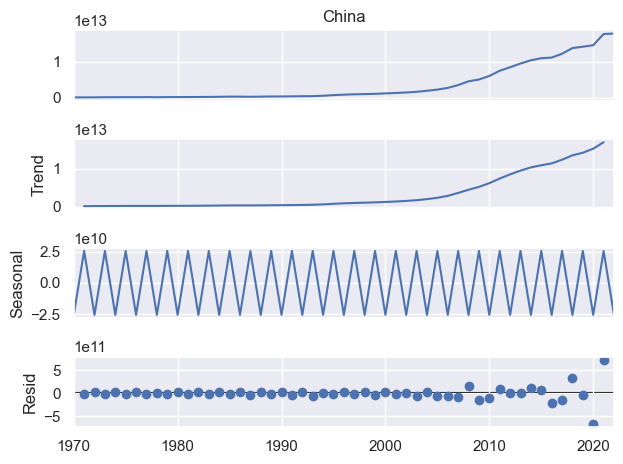

In [132]:
descomp = seasonal_decompose(df_pibt_china["China"], period = 2)
descomp.plot()
plt.show()

Forecasting

In [133]:
df_pibt_china

China
Year                    
1970-01-01  9.260264e+10
1971-01-01  9.980060e+10
1972-01-01  1.136893e+11
1973-01-01  1.385432e+11
1974-01-01  1.441890e+11
1975-01-01  1.634295e+11
1976-01-01  1.539392e+11
1977-01-01  1.749359e+11
1978-01-01  1.495408e+11
1979-01-01  1.782806e+11
1980-01-01  1.911492e+11
1981-01-01  1.958664e+11
1982-01-01  2.050897e+11
1983-01-01  2.306867e+11
1984-01-01  2.599465e+11
1985-01-01  3.094880e+11
1986-01-01  3.007581e+11
1987-01-01  2.729730e+11
1988-01-01  3.123536e+11
1989-01-01  3.477681e+11
1990-01-01  3.608579e+11
1991-01-01  3.833733e+11
1992-01-01  4.269157e+11
1993-01-01  4.447313e+11
1994-01-01  5.643219e+11
1995-01-01  7.344849e+11
1996-01-01  8.637493e+11
1997-01-01  9.616020e+11
1998-01-01  1.029061e+12
1999-01-01  1.094010e+12
2000-01-01  1.211332e+12
2001-01-01  1.339401e+12
2002-01-01  1.470558e+12
2003-01-01  1.660281e+12
2004-01-01  1.955347e+12
2005-01-01  2.285961e+12
2006-01-01  2.752119e+12
2007-01-01  3.550328e+12
2008-01-01  4.594337e+12
2009-01-01  5.101691e+12
2010-01-01  6.087192e+12
2011-01-01  7.551545e+12
2012-01-01  8.532186e+12
2013-01-01  9.570471e+12
2014-01-01  1.047562e+13
2015-01-01  1.106157e+13
2016-01-01  1.123331e+13
2017-01-01  1.231049e+13
2018-01-01  1.389491e+13
2019-01-01  1.427997e+13
2020-01-01  1.468774e+13
2021-01-01  1.782046e+13
2022-01-01  1.796317e+13

In [134]:
df_pibt_china['Year'] = df_pibt_china.index
# Dataframe para entrenamiento (fragmentar esta casilla si se quiere entender el paso a paso del codigo)
train_china = df_pibt_china[df_pibt_china['Year'] < pd.to_datetime("2017-01-01", format='%Y-%m-%d')] # Separamos train hasta el agosto de 1960
train_china['train'] = train_china['China']
del train_china['Year']
del train_china['China']

C:\Users\nico_\AppData\Local\Temp\ipykernel_43368\3702863118.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
train_china

train
Year                    
1970-01-01  9.260264e+10
1971-01-01  9.980060e+10
1972-01-01  1.136893e+11
1973-01-01  1.385432e+11
1974-01-01  1.441890e+11
1975-01-01  1.634295e+11
1976-01-01  1.539392e+11
1977-01-01  1.749359e+11
1978-01-01  1.495408e+11
1979-01-01  1.782806e+11
1980-01-01  1.911492e+11
1981-01-01  1.958664e+11
1982-01-01  2.050897e+11
1983-01-01  2.306867e+11
1984-01-01  2.599465e+11
1985-01-01  3.094880e+11
1986-01-01  3.007581e+11
1987-01-01  2.729730e+11
1988-01-01  3.123536e+11
1989-01-01  3.477681e+11
1990-01-01  3.608579e+11
1991-01-01  3.833733e+11
1992-01-01  4.269157e+11
1993-01-01  4.447313e+11
1994-01-01  5.643219e+11
1995-01-01  7.344849e+11
1996-01-01  8.637493e+11
1997-01-01  9.616020e+11
1998-01-01  1.029061e+12
1999-01-01  1.094010e+12
2000-01-01  1.211332e+12
2001-01-01  1.339401e+12
2002-01-01  1.470558e+12
2003-01-01  1.660281e+12
2004-01-01  1.955347e+12
2005-01-01  2.285961e+12
2006-01-01  2.752119e+12
2007-01-01  3.550328e+12
2008-01-01  4.594337e+12
2009-01-01  5.101691e+12
2010-01-01  6.087192e+12
2011-01-01  7.551545e+12
2012-01-01  8.532186e+12
2013-01-01  9.570471e+12
2014-01-01  1.047562e+13
2015-01-01  1.106157e+13
2016-01-01  1.123331e+13

In [136]:
# Dataframe de testeo
test_china = df_pibt_china[df_pibt_china['Year'] >= pd.to_datetime("2017-01-01", format='%Y-%m-%d')]
del test_china['Year']
test_china['test'] = test_china['China']
del test_china['China']

C:\Users\nico_\AppData\Local\Temp\ipykernel_43368\1889825400.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
test_china

test
Year                    
2017-01-01  1.231049e+13
2018-01-01  1.389491e+13
2019-01-01  1.427997e+13
2020-01-01  1.468774e+13
2021-01-01  1.782046e+13
2022-01-01  1.796317e+13

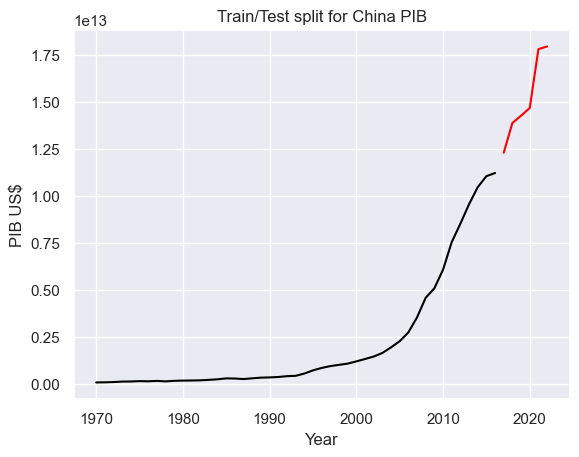

In [138]:
# Visualizar datos de entrenamiento vs datos de testeo
plt.plot(train_china, color = "black")
plt.plot(test_china, color = "red")
plt.title("Train/Test split for China PIB")
plt.ylabel("PIB US$")
plt.xlabel('Year')
sns.set()
plt.show()

In [139]:
# Buscamos los mejores parámetros para el modelo ARIMA
model = auto_arima(train_china, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_china)
# Creamos predicciones sobre el modelo entrenado
forecast_china = model.predict(n_periods=len(test_china))
forecast_china = pd.DataFrame(forecast_china,index = test_china.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2462.405, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2463.998, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2465.670, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2465.650, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=2463.803, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=2460.146, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2467.256, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=2463.843, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=2460.459, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=2458.769, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=2460.154, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=2462.227, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2460.754, Time=0.05 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.545 seconds


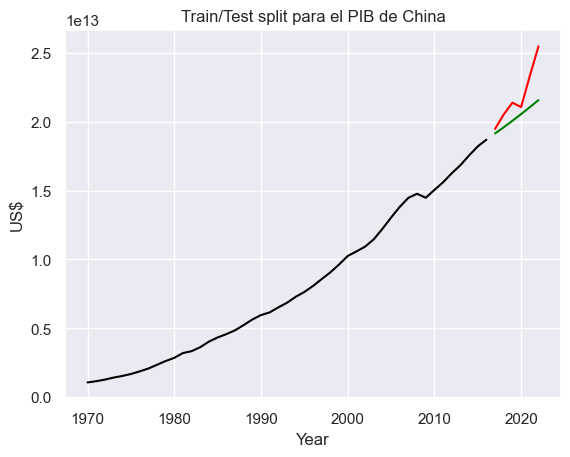

In [140]:
forecast_usa# Visualizar datos de entrenamiento vs datos de testeo vs el forecast
plt.plot(train_usa, color = "black")
plt.plot(test_usa, color = "red")
plt.plot(forecast_usa, color = "green")
plt.title("Train/Test split para el PIB de China")
plt.ylabel("US$")
plt.xlabel('Year')
sns.set()
plt.show()

## Conversión de dataframe a CSV

In [141]:
#inflacion = pd.DataFrame(df_cpi)
#inflacion.to_csv('inflacion.csv', index=False)
#df.to_csv('df_original.csv',index=False)
#df_pibt.to_csv('pib_total.csv',index=False)
#df_pib.to_csv('pib_crecimiento.csv',index=False)
#df_pibpc.to_csv('PIB_per_capita.csv',index=False)
#df_des.to_csv('tasa_de_desempleo.csv',index=False)
#train_usa.to_csv('train_usa.csv',index=False)
#test_usa.to_csv('test_usa.csv',index=False)
#forecast_usa.to_csv('forecast_usa.csv',index=False)
#df_pibtn.to_csv('pib_mundial.csv',index=False)